## Panel Data Models

### Introduction
* Panel data is simply a 2D concept, where the sama individuals are observed repeatedly over diff periods of time. That is combination of cross-sectional data and time series data.

* In this project we ar going to use the prison data to estimate different factors that result in an increase in prison population in a region over a given period of time.

* The dataset used has 45 features. Each feature is described in the following link. http://fmwww.bc.edu/ec-p/data/wooldridge/prison.des

In [1]:
#Importing important libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from BorutaShap import BorutaShap
from sklearn.ensemble import RandomForestRegressor

## Dataset Description

In [2]:
#Loading the dataset
from linearmodels.datasets import jobtraining
dataset1 = jobtraining.load()
dataset1=pd.DataFrame(dataset1)

In [5]:
#Loading the dataset
dataset=pd.read_csv("dataset-26543.csv")
dataset.head()

,state,year,govelec,black,metro,unem,criv,crip,lcriv,lcrip,...,cag18_24,cag25_34,cunem,cblack,cmetro,pris,lpris,gpris,final1,final2
0,1,80,0,0.2560,0.6320,0.08775,4.447868,44.476376,1.492425,3.794958,...,0.000077,0.001990,0.01675,-0.059999,0.0002,141.334717,4.951131,-0.020659,0,0
1,1,81,0,0.2557,0.6362,0.10667,4.700944,44.248787,1.547763,3.789828,...,0.000177,0.004632,0.01892,-0.030001,0.0042,163.533646,5.097019,0.145888,0,0
2,1,82,1,0.2554,0.6404,0.14367,4.497580,42.050446,1.503539,3.738870,...,-0.000712,0.000013,0.03700,-0.029999,0.0042,183.694809,5.213276,0.116257,0,0
3,1,83,0,0.2551,0.6446,0.13667,4.186833,37.084393,1.431945,3.613196,...,-0.001318,0.001163,-0.00700,-0.030001,0.0042,218.624207,5.387354,0.174078,0,0
4,1,84,0,0.2548,0.6488,0.11167,4.353239,35.042255,1.470920,3.556555,...,-0.002618,0.001297,-0.02500,-0.030001,0.0042,245.068619,5.501538,0.114184,0,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     714 non-null    int64  
 1   year      714 non-null    int64  
 2   govelec   714 non-null    int64  
 3   black     714 non-null    float64
 4   metro     714 non-null    float64
 5   unem      714 non-null    float64
 6   criv      714 non-null    float64
 7   crip      714 non-null    float64
 8   lcriv     714 non-null    float64
 9   lcrip     714 non-null    float64
 10  gcriv     714 non-null    float64
 11  gcrip     714 non-null    float64
 12  y81       714 non-null    int64  
 13  y82       714 non-null    int64  
 14  y83       714 non-null    int64  
 15  y84       714 non-null    int64  
 16  y85       714 non-null    int64  
 17  y86       714 non-null    int64  
 18  y87       714 non-null    int64  
 19  y88       714 non-null    int64  
 20  y89       714 non-null    int64 

* All columns do not have any null data

In [7]:
dataset.describe()

,state,year,govelec,black,metro,unem,criv,crip,lcriv,lcrip,...,cag18_24,cag25_34,cunem,cblack,cmetro,pris,lpris,gpris,final1,final2
count,714.00000,714.000000,714.00000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,26.00000,86.500000,0.25070,0.105329,0.641727,0.068487,5.078585,46.435141,1.426112,3.803649,...,-0.002448,-0.000262,0.000525,0.030098,0.001596,199.980341,5.129948,0.066474,0.008403,0.016807
std,14.72992,4.033955,0.43372,0.121210,0.225690,0.022151,3.440078,12.117244,0.654660,0.265534,...,0.002047,0.003081,0.012399,0.089816,0.003081,132.713456,0.580049,0.066585,0.091348,0.128637
min,1.00000,80.000000,0.00000,0.002000,0.153000,0.021420,0.475628,20.965015,-0.743120,3.042855,...,-0.010630,-0.008652,-0.041840,-0.450005,-0.003500,20.826952,3.036248,-0.214960,0.000000,0.000000
25%,13.00000,83.000000,0.00000,0.020250,0.457850,0.053000,2.824363,38.671989,1.038283,3.655116,...,-0.003680,-0.002845,-0.007000,0.009999,0.000000,113.038683,4.727730,0.024878,0.000000,0.000000
50%,26.00000,86.500000,0.00000,0.071000,0.671350,0.066000,4.515549,45.185146,1.507526,3.810768,...,-0.002491,-0.000067,-0.000790,0.020000,0.000800,172.454063,5.150131,0.064914,0.000000,0.000000
75%,39.00000,90.000000,0.75000,0.148075,0.815925,0.080958,6.500603,54.392672,1.871895,3.996229,...,-0.001178,0.001760,0.008640,0.070000,0.002200,251.896126,5.529016,0.104964,0.000000,0.000000
max,51.00000,93.000000,1.00000,0.703000,1.000000,0.180330,29.217993,88.392731,3.374785,4.481790,...,0.005333,0.010487,0.046580,0.490002,0.014300,1286.837524,7.159943,0.364590,1.000000,1.000000


In [8]:
cols = dataset1.columns.tolist()

#fill null values with mean
"""for i in range(len(cols)):
    colmean=np.mean(dataset1[cols[i]])
    dataset1[cols[i]].fillna(value=colmean, inplace=True)
dataset.describe()"""

'for i in range(len(cols)):\n    colmean=np.mean(dataset1[cols[i]])\n    dataset1[cols[i]].fillna(value=colmean, inplace=True)\ndataset.describe()'

In [9]:
#Definition of X and y
x_cols=[cl for cl in dataset.columns.values.tolist() if cl != 'pris']

X = dataset[x_cols]
y = dataset['pris']
X.shape,y.shape

((714, 44), (714,))

### Data Analysis

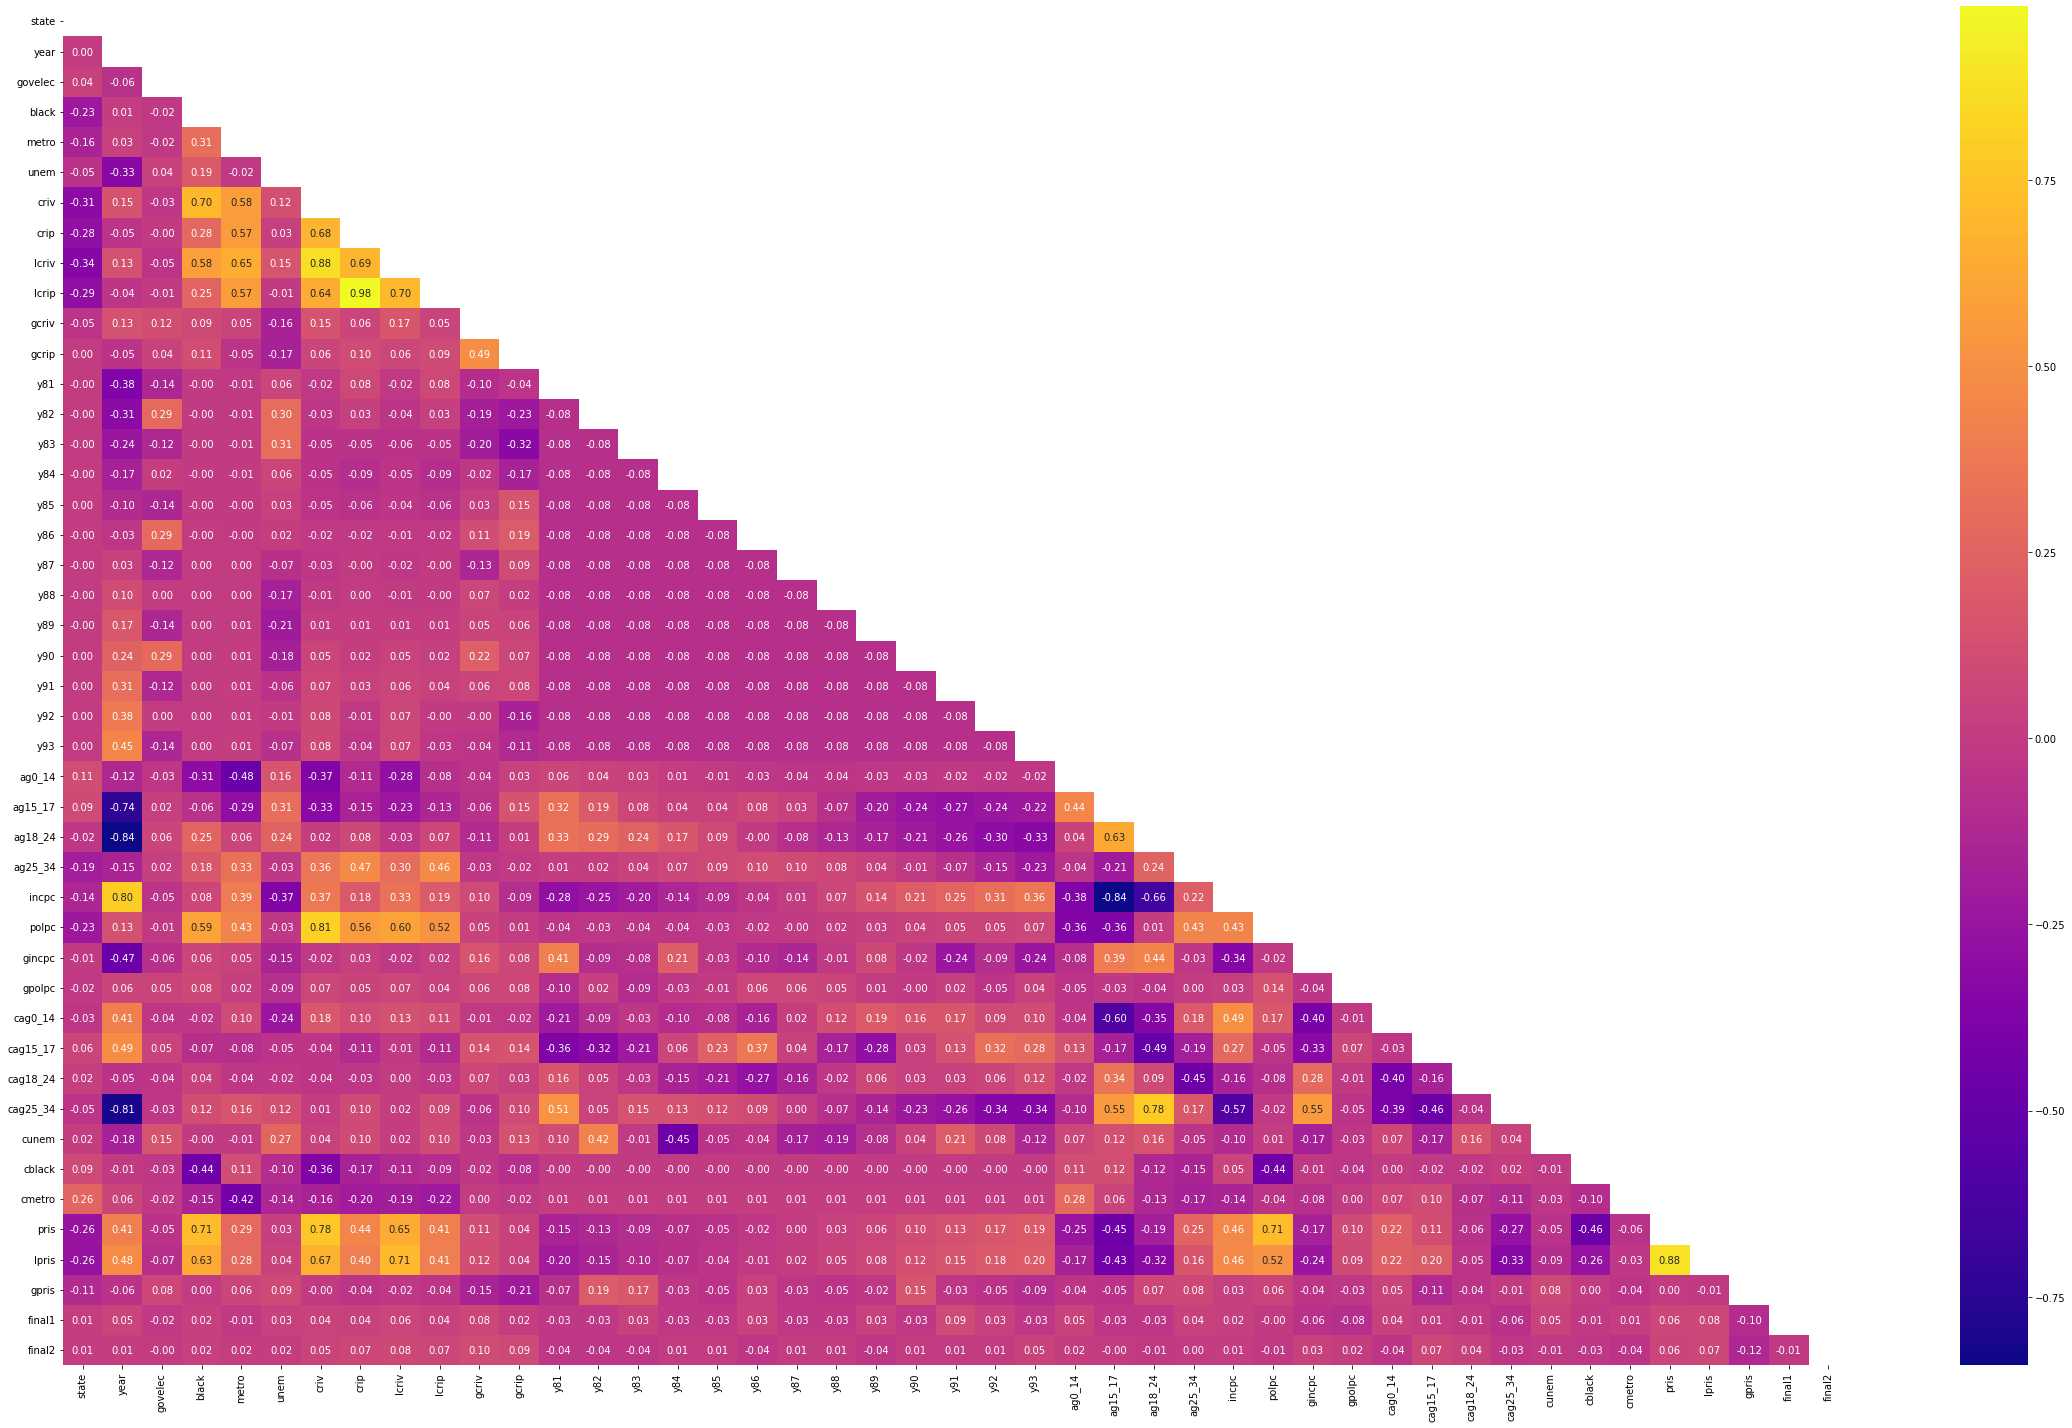

In [10]:
# Heat map showing correlation between available features and outcome.
fig, ax_s = plt.subplots(figsize=(40,25), ncols=1, nrows=1)
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(dataset.corr())
dropvals[np.triu_indices_from(dropvals)] = True 
sns.heatmap(dataset.corr() ,cmap='plasma',ax=ax_s,annot = True, fmt = ".2f", mask = dropvals)
plt.show()

* So much data.
* from the above figure about 22 features were positevely correlated to pris where criv had the max positive correlation of 0.78.
* about 15 were negatively correlated with cblack having the highest negative correlation of -0.46.

In [11]:
# Displaying the five-number summary: ie the maximum and minimum values, the lower and upper quartiles and the median.
def the_five_summary(df):
    cols = df.columns.values.tolist()
    summary={}
    for i in range(len(cols)):
        summary[cols[i]]={
                    "Min val":min(df[cols[i]]),
                    "Max val":max((df[cols[i]])),
                    "Mean":round(np.mean(df[cols[i]]),2),
                    "Median":np.median(df[cols[i]]),
                    "Upper Quartile":np.quantile(df[cols[i]], 0.75),
                    "Lower Quartile":np.quantile(df[cols[i]], 0.25)
                   }
    return summary

the_5_summary = the_five_summary(X)
for key,val in the_5_summary.items():
    print(f"Summary for {key}:=> {val}\n")

Summary for state:=> {'Min val': 1, 'Max val': 51, 'Mean': 26.0, 'Median': 26.0, 'Upper Quartile': 39.0, 'Lower Quartile': 13.0}

Summary for year:=> {'Min val': 80, 'Max val': 93, 'Mean': 86.5, 'Median': 86.5, 'Upper Quartile': 90.0, 'Lower Quartile': 83.0}

Summary for govelec:=> {'Min val': 0, 'Max val': 1, 'Mean': 0.25, 'Median': 0.0, 'Upper Quartile': 0.75, 'Lower Quartile': 0.0}

Summary for black:=> {'Min val': 0.0020000000949949, 'Max val': 0.703000009059906, 'Mean': 0.11, 'Median': 0.0710000023245811, 'Upper Quartile': 0.14807500317692798, 'Lower Quartile': 0.020249999128282074}

Summary for metro:=> {'Min val': 0.152999997138977, 'Max val': 1.0, 'Mean': 0.64, 'Median': 0.6713500320911405, 'Upper Quartile': 0.8159249871969223, 'Lower Quartile': 0.4578500017523767}

Summary for unem:=> {'Min val': 0.0214200001209974, 'Max val': 0.180329993367195, 'Mean': 0.07, 'Median': 0.0659999996423721, 'Upper Quartile': 0.0809575002640486, 'Lower Quartile': 0.0530000030994415}

Summary for 

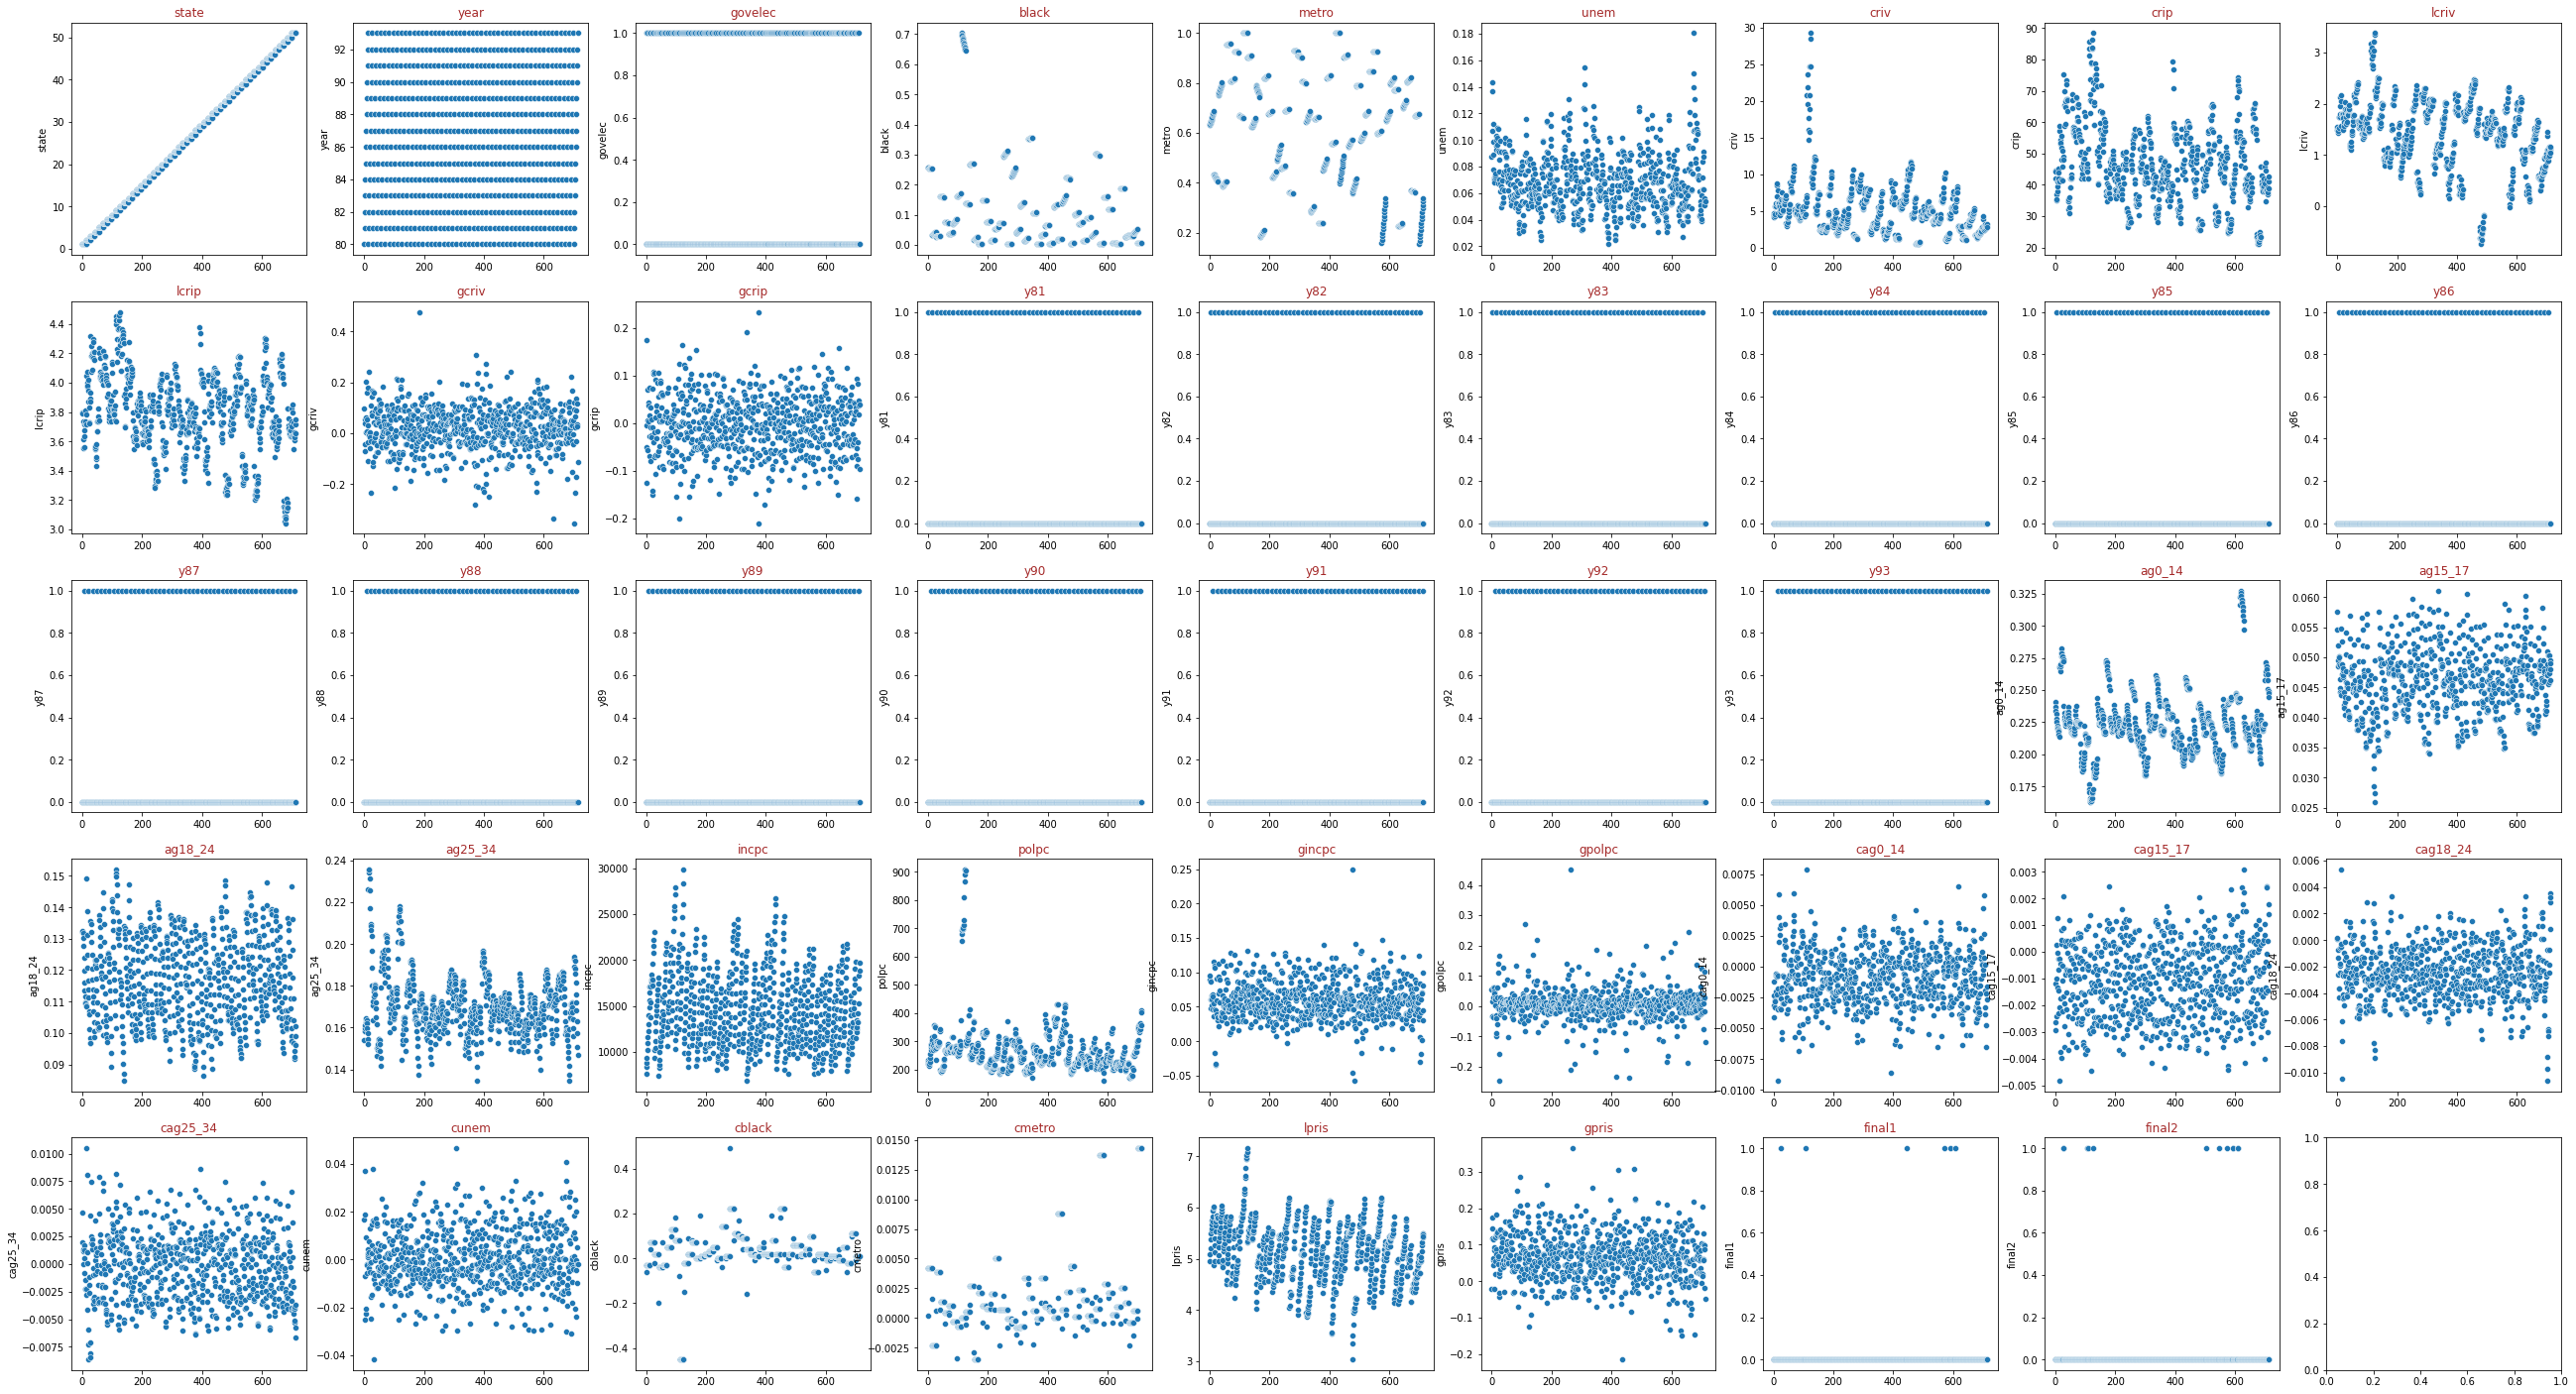

In [12]:
# analyzing data distribution using Scatterplots.
def scatterplt_maker(df, cols, r, c):
    fig, ax = plt.subplots(figsize=(45, 25),ncols=9, nrows=5)
    ax = ax.flatten()
    for i in range(len(cols)):
        sns.scatterplot(data=df[cols[i]],ax=ax[i])
        ax[i].set_title(cols[i], color="brown")
    plt.show()
cols = X.columns.values.tolist()
scatterplt_maker(X,cols, 5, 9)

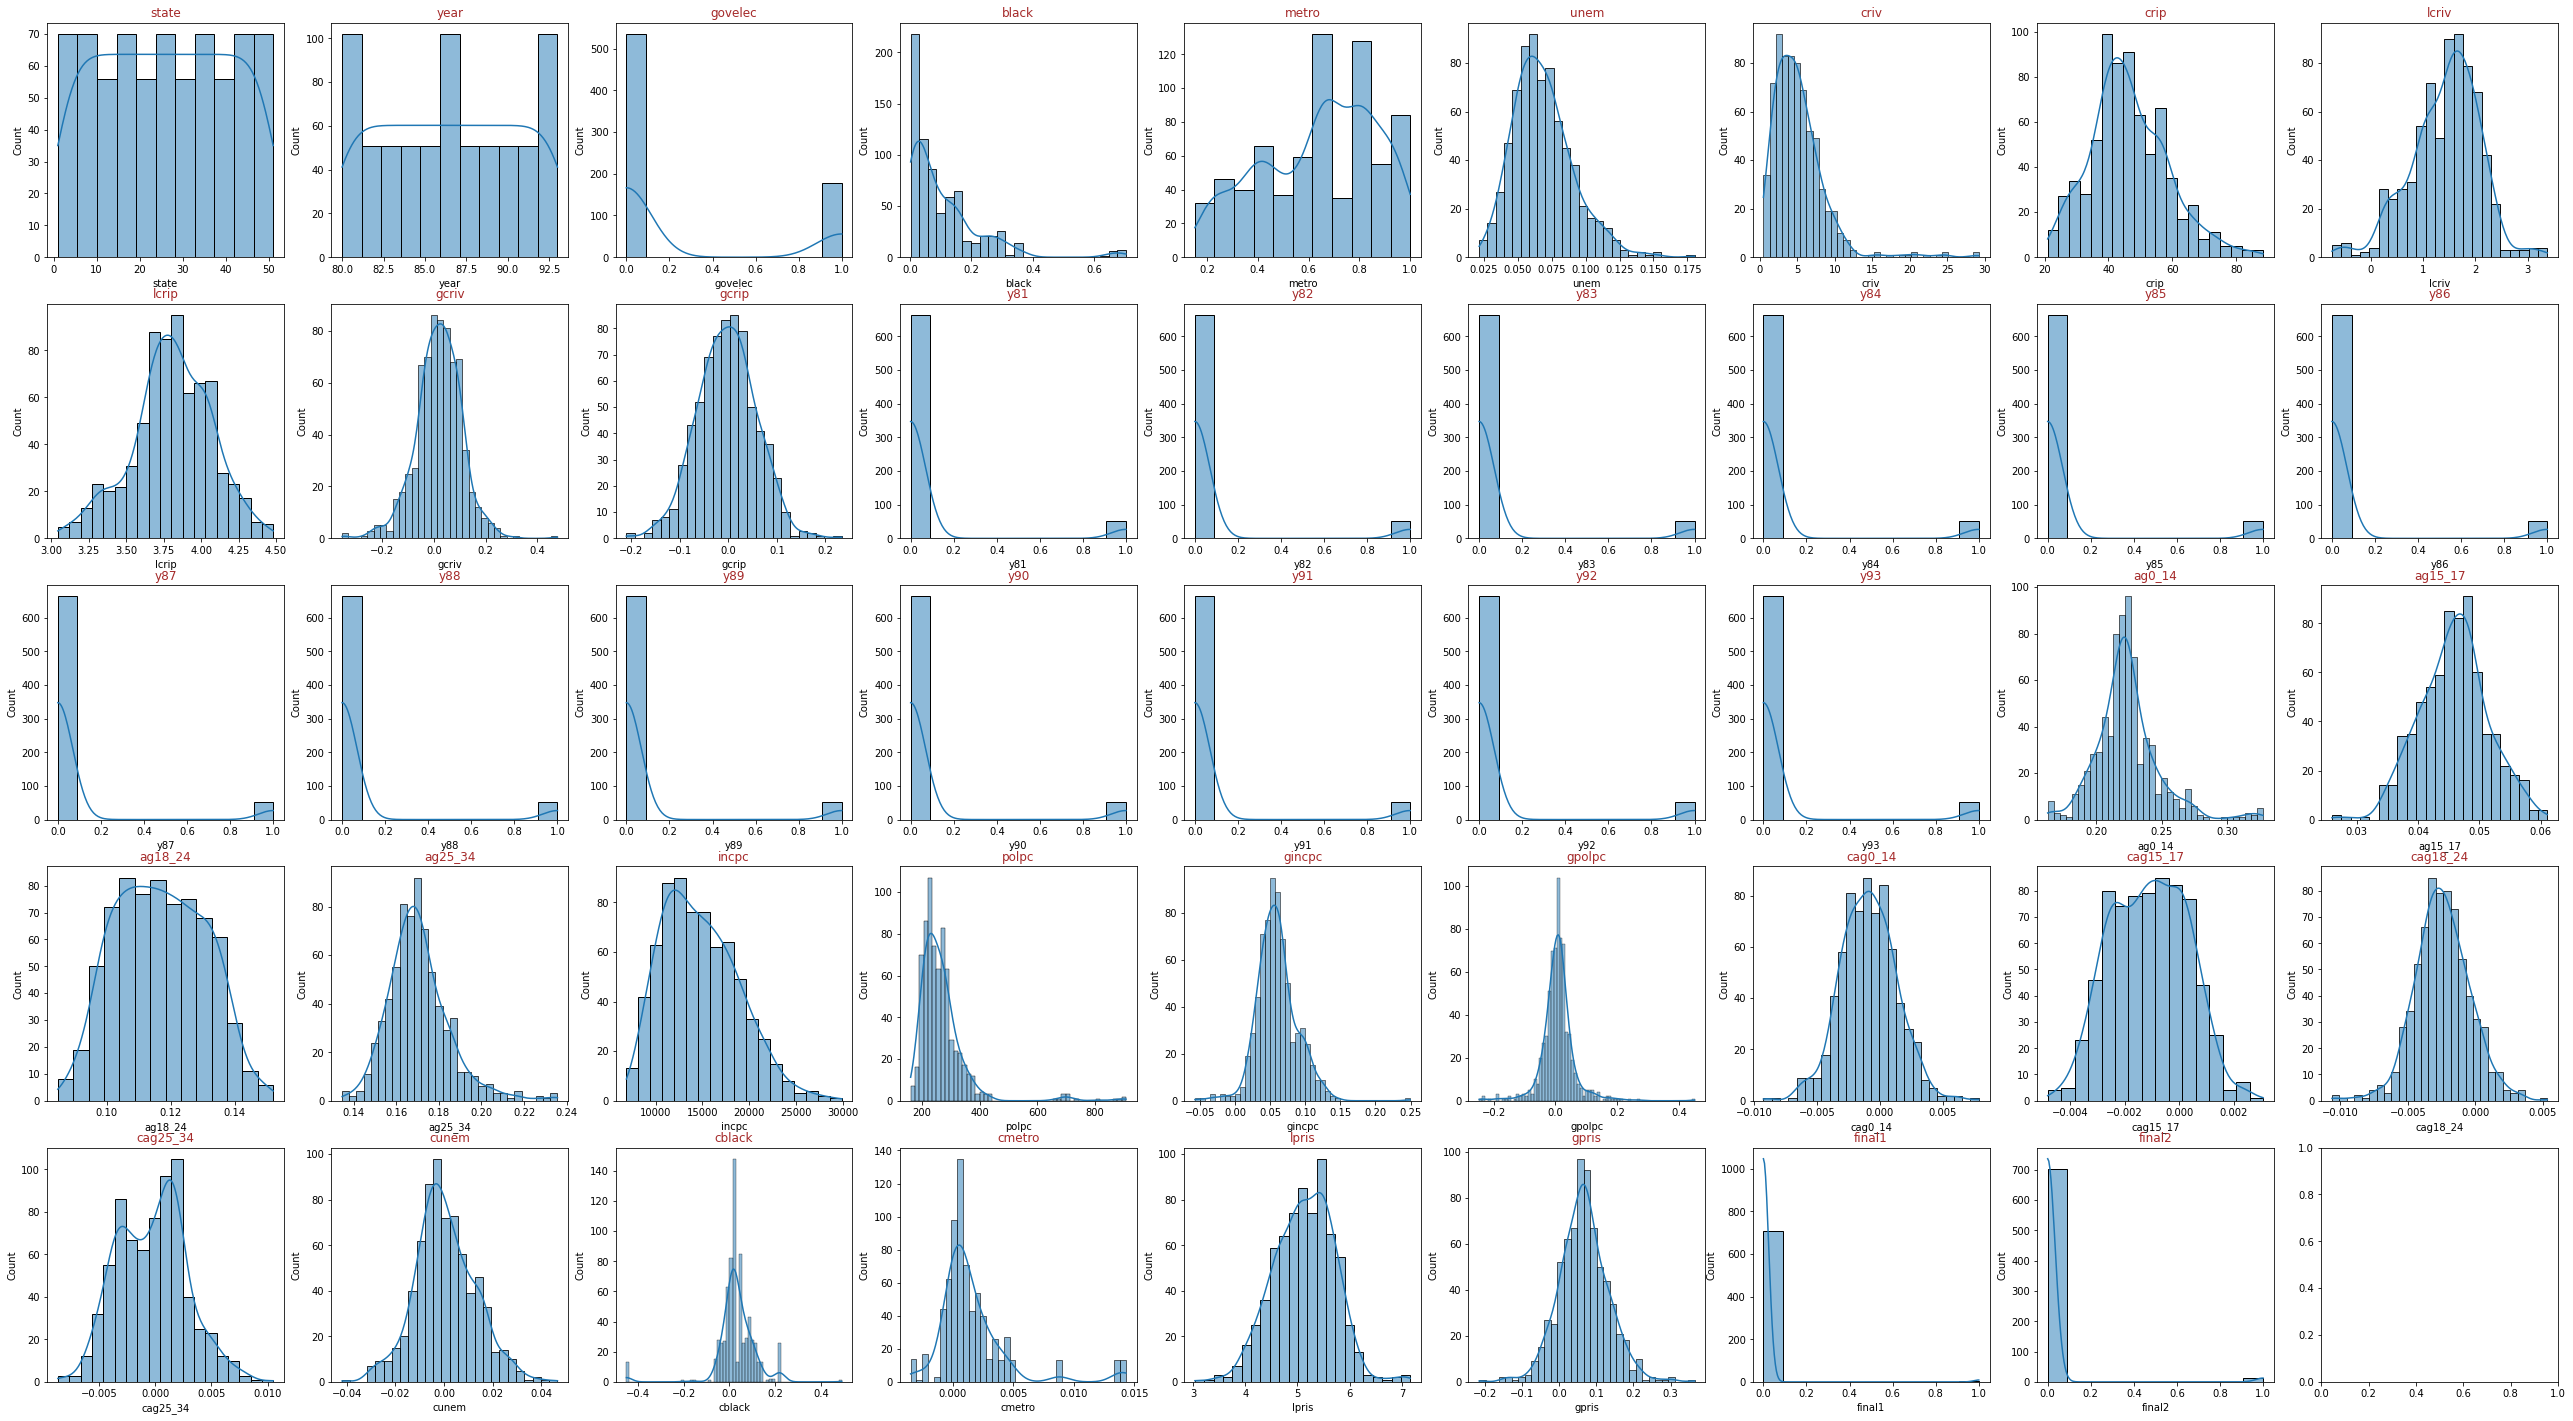

In [13]:
# analyzing data distribution using Histograms.
def histplt_maker(df, cols, r, c):
    fig, ax = plt.subplots(figsize=(45, 25),ncols=c, nrows=r)
    ax = ax.flatten()
    for i in range(len(cols)):
        sns.histplot(data=df[cols[i]], ax=ax[i],kde=True)
        ax[i].set_title(cols[i], color="brown")
    plt.show()
histplt_maker(X,cols, 5, 9)

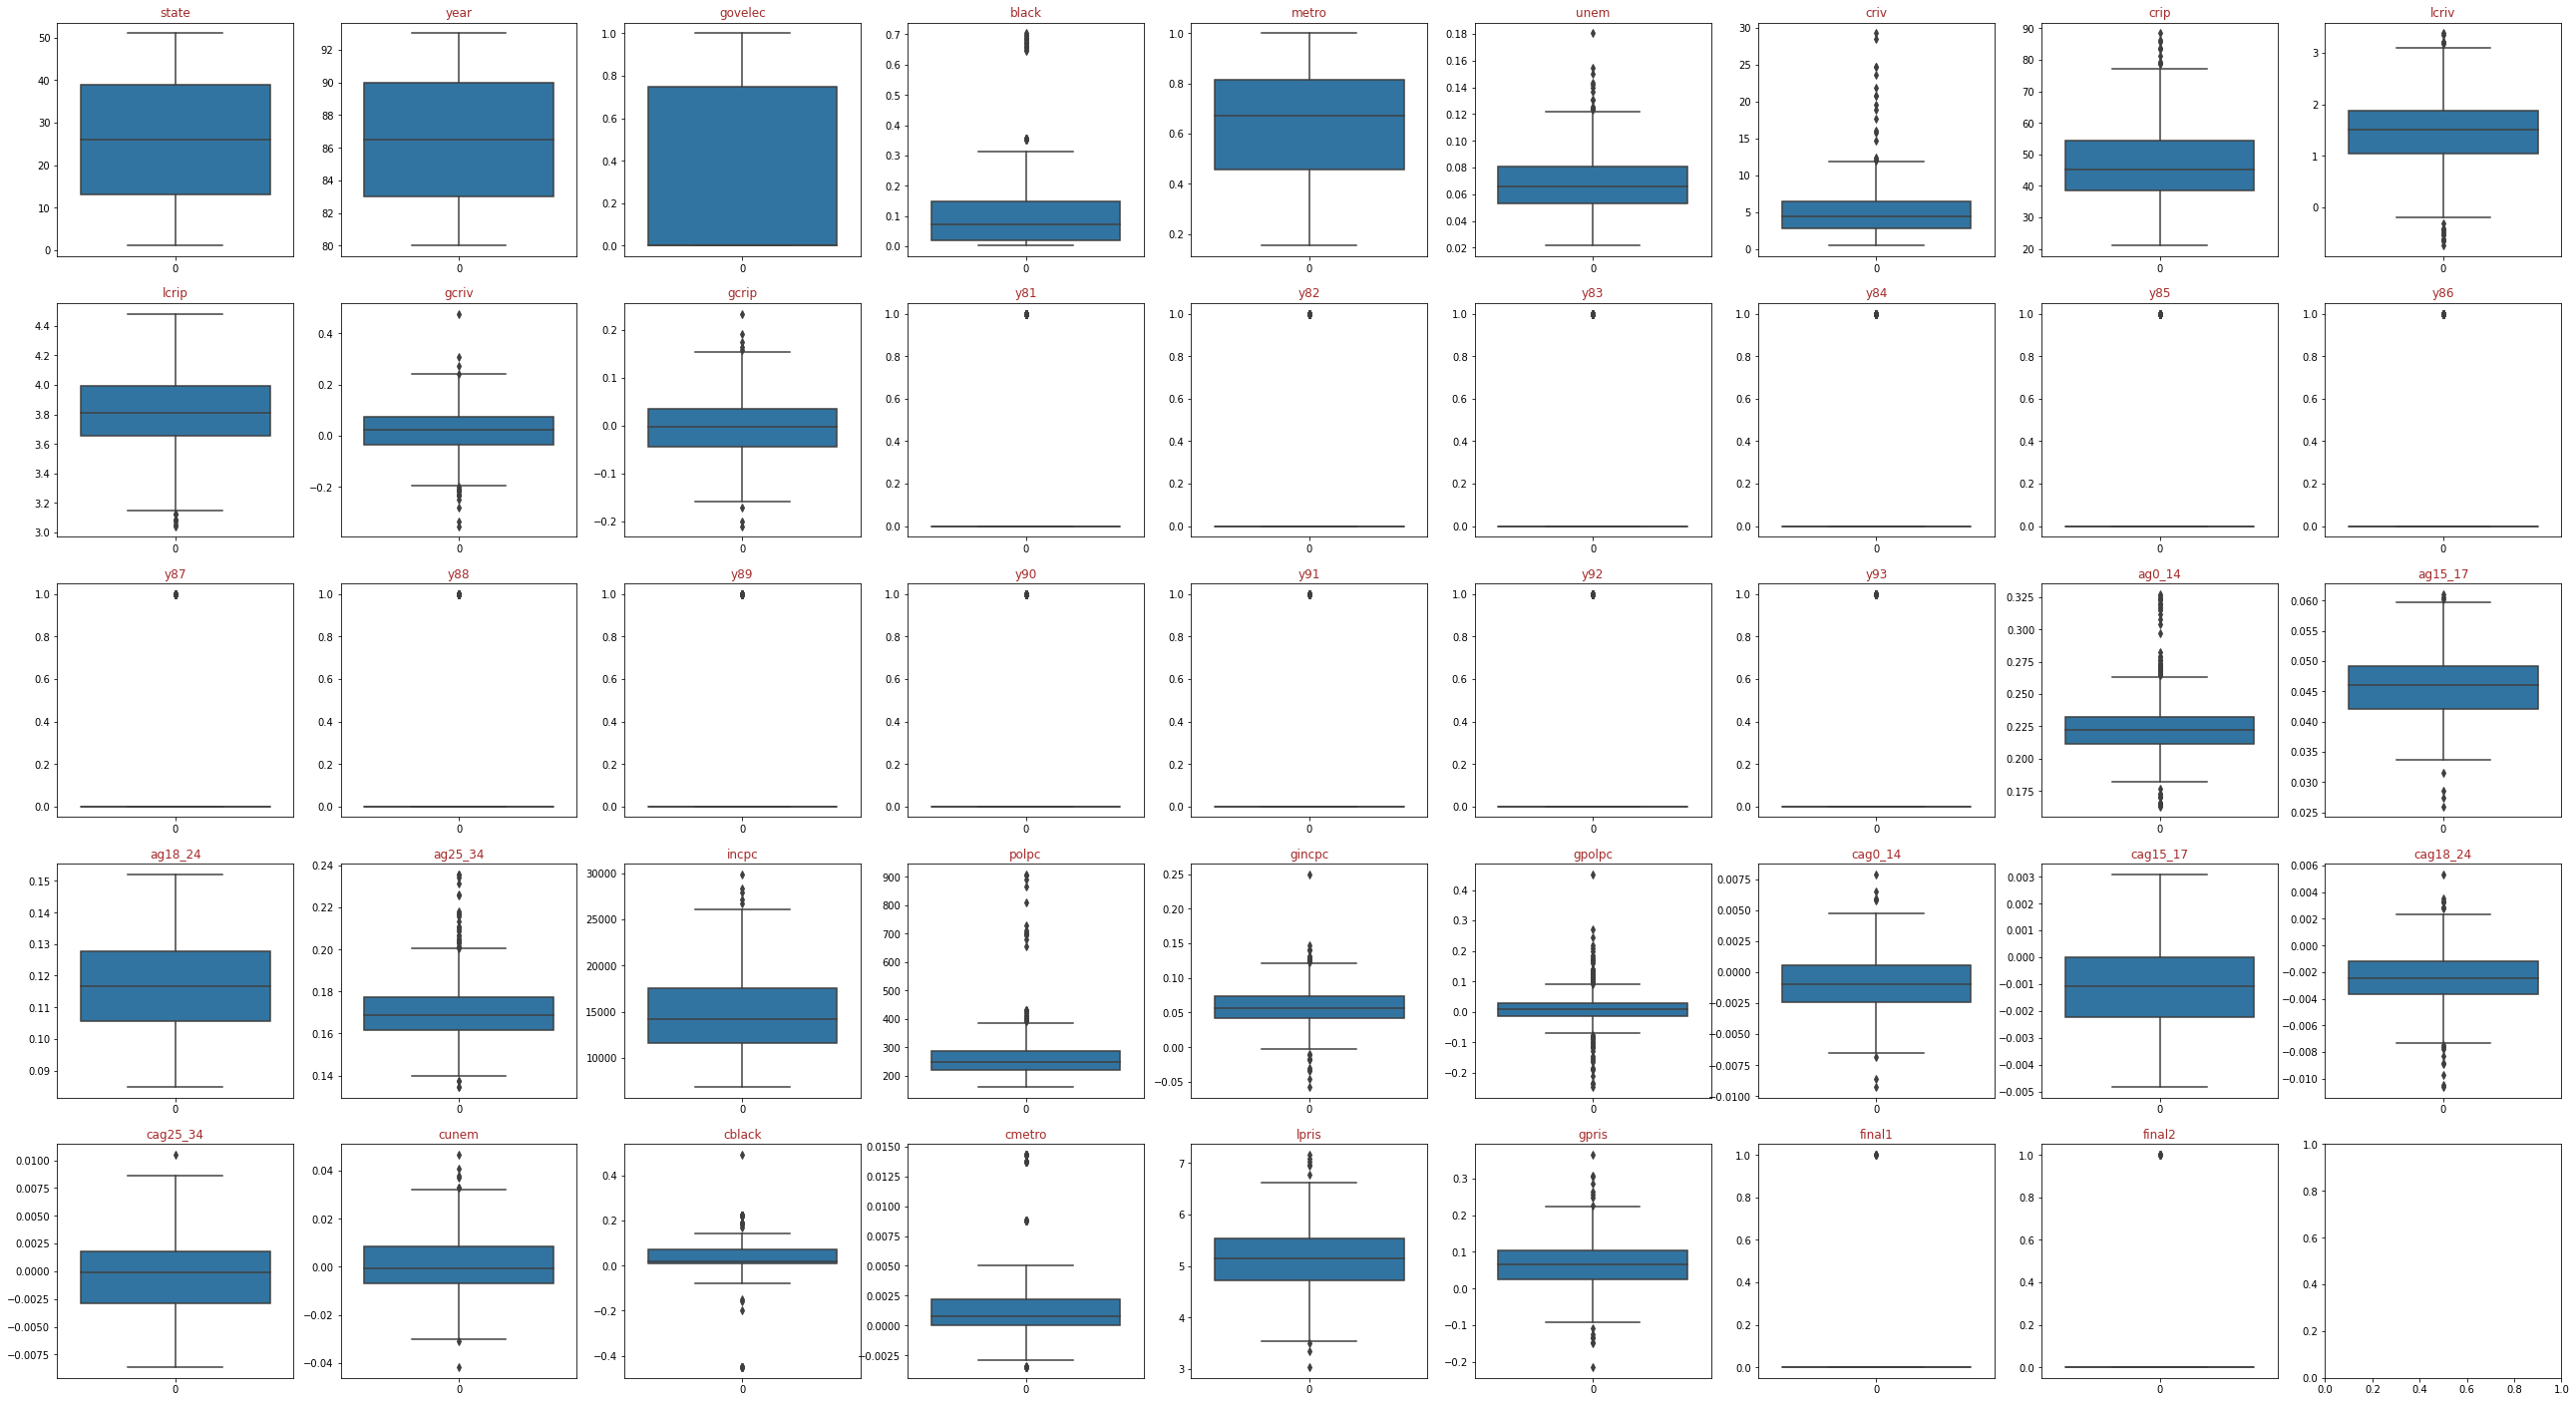

In [14]:
#analyzing data distribution using boxplots
def boxplt_maker(df, cols, r, c):
    fig, ax = plt.subplots(figsize=(45, 25),ncols=c, nrows=r)
    ax = ax.flatten()
    for i in range(len(cols)):
        sns.boxplot(data=df[cols[i]],ax=ax[i])
        ax[i].set_title(cols[i], color="brown")
    plt.show()
    
boxplt_maker(X, cols, 5, 9)

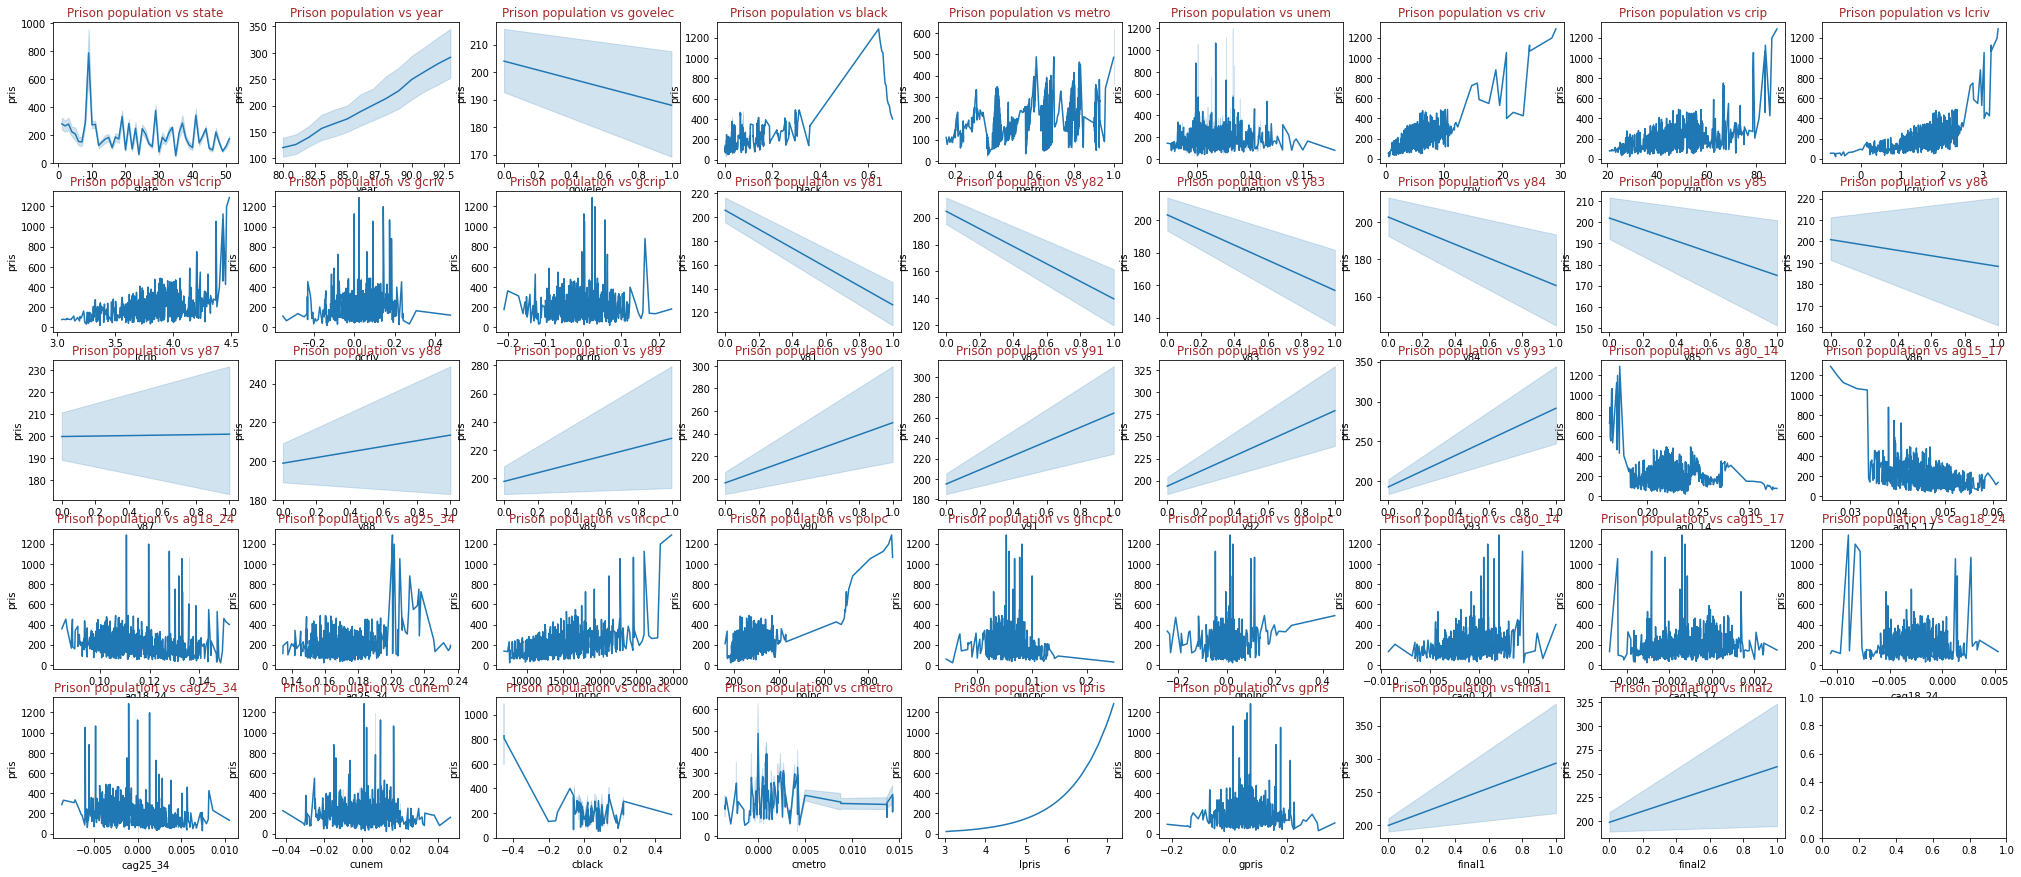

In [15]:
#analyzing relationship between features and output using bar plot.
def outcome_vs_features(data, cols, r, c):
    fig, ax = plt.subplots(figsize=(35, 15),ncols=c, nrows=r)
    ax = ax.flatten()
    for i in range(len(cols)):
        #ax[i].bar( y, X[cols[i]])
        sns.lineplot(data=data, y="pris", x=cols[i], ax=ax[i])
        ax[i].set_title(f"Prison population vs {cols[i]}", color="brown")
    plt.show()
    
outcome_vs_features(dataset, cols, 5, 9)

  0%|          | 0/30 [00:00<?, ?it/s]

7 attributes confirmed important: ['black', 'polpc', 'lpris', 'criv', 'ag0_14', 'ag15_17', 'lcriv']
29 attributes confirmed unimportant: ['gpolpc', 'cag18_24', 'metro', 'gcriv', 'y89', 'cmetro', 'state', 'y85', 'y92', 'y88', 'y93', 'unem', 'cag15_17', 'cunem', 'cag25_34', 'y91', 'gcrip', 'govelec', 'final1', 'y87', 'y81', 'y84', 'gincpc', 'y86', 'final2', 'y90', 'y83', 'y82', 'gpris']
8 tentative attributes remains: ['ag25_34', 'year', 'crip', 'ag18_24', 'cblack', 'cag0_14', 'incpc', 'lcrip']


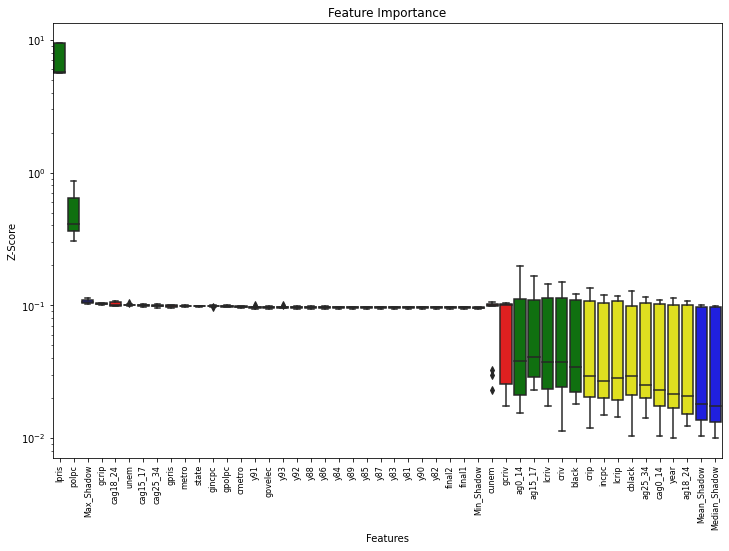

In [16]:
#select best features using Boruta selection
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=30, random_state=0)
Feature_Selector.plot(which_features='all')

In [17]:
# First, we run a regression with all predictors
import statsmodels.formula.api as smf

#important columns from Boruta feature selector
impt_cols=['lcriv', 'lpris', 'ag0_14', 'criv', 'polpc', 'ag15_17', 'black']

col_sums=" + ".join(x_cols)

reg1 = smf.ols(f"pris ~ {col_sums}", data = dataset)
result1 = reg1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pris   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     200.4
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:08:44   Log-Likelihood:                -3564.2
No. Observations:                 714   AIC:                             7216.
Df Residuals:                     670   BIC:                             7418.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -124.3130     22.429     -5.543      0.000    -168.352     -80.274
state         -0.0933      0.109     -0.853      0.394      -0.308       0.121
year         -10.4046      1.385     -7.512      0.000     -13.124      -7.685
govelec        0.3519      3.996      0.088      0.930      -7.493       8.197
black        -11.6166     28.212     -0.412      0.681     -67.010      43.777
metro         41.9038     13.230      3.167      0.002      15.927      67.881
unem         -87.6524    112.129     -0.782      0.435    -307.820     132.515
criv          18.3408      1.707     10.746      0.000      14.990      21.692
crip          -1.1957      0.925     -1.292      0.197      -3.013       0.621
lcriv        -84.6238      8.473     -9.987      0.000    -101.261     -67.987
lcrip         34.0002     41.732      0.815      0.416     -47.941     115.942
gcriv         17.0366     20.479      0.832      0.406     -23.174      57.247
gcrip         16.3146     35.613      0.458      0.647     -53.613      86.242
y81            8.5075      9.027      0.942      0.346      -9.218      26.233
y82           -7.3988     11.337     -0.653      0.514     -29.659      14.862
y83           17.8662     12.274      1.456      0.146      -6.234      41.967
y84           35.1649     14.196      2.477      0.013       7.291      63.038
y85           60.4891     14.285      4.234      0.000      32.440      88.538
y86           79.9449     15.974      5.005      0.000      48.579     111.310
y87           79.9413     16.421      4.868      0.000      47.699     112.184
y88           80.1103     18.301      4.377      0.000      44.176     116.044
y89           87.6546     20.527      4.270      0.000      47.350     127.959
y90          114.9467     22.644      5.076      0.000      70.485     159.408
y91          139.4060     24.263      5.746      0.000      91.764     187.048
y92          161.6880     26.510      6.099      0.000     109.635     213.741
y93          180.9234     28.431      6.364      0.000     125.098     236.749
ag0_14       137.4188    106.527      1.290      0.197     -71.748     346.586
ag15_17     -177.6577    934.244     -0.190      0.849   -2012.057    1656.741
ag18_24     1007.7124    316.590      3.183      0.002     386.084    1629.340
ag25_34      -57.2542    204.187     -0.280      0.779    -458.178     343.669
incpc         -0.0025      0.001     -1.766      0.078      -0.005       0.000
polpc          0.2443      0.040      6.144      0.000       0.166       0.322
gincpc       188.5705     82.509      2.285      0.023      26.563     350.578
gpolpc        10.5319     26.982      0.390      0.696     -42.448      63.512
cag0_14    -2046.2909   1087.483     -1.882      0.060   -4181.576      88.994
cag15_17   -1.149e+04   2607.057     -4.408      0.000   -1.66e+04   -6374.075
ca

In [18]:
y_pred=result1.fittedvalues

In [19]:
# This cell take a very long time to execute you can use the following commented three cells 
#to get better selected features
"""import itertools
from RegscorePy import mallow


storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k= 44

for L in range(1, 9):
    for subset in itertools.combinations(x_cols, L):
        
        # join the strings in the data together
        formula1 = 'pris~'+'+'.join(subset)
        
        # get the cp
        results = smf.ols(formula=formula1, data = dataset).fit()
        y_sub = results.fittedvalues
        p = 9 # number of parameters in the subset model (includes y-intercept)
        
        cp = mallow.mallow(y, y_pred,y_sub, k, p)
        
        # add to the dataframe
        df_new_row = pd.DataFrame({'Variables': [subset], 'CP': [cp]})
        storage_cp = pd.concat([storage_cp, df_new_row])"""

'import itertools\nfrom RegscorePy import mallow\n\n\nstorage_cp = pd.DataFrame(columns = ["Variables", "CP"])\nk= 44\n\nfor L in range(1, 9):\n    for subset in itertools.combinations(x_cols, L):\n        \n        # join the strings in the data together\n        formula1 = \'pris~\'+\'+\'.join(subset)\n        \n        # get the cp\n        results = smf.ols(formula=formula1, data = dataset).fit()\n        y_sub = results.fittedvalues\n        p = 9 # number of parameters in the subset model (includes y-intercept)\n        \n        cp = mallow.mallow(y, y_pred,y_sub, k, p)\n        \n        # add to the dataframe\n        df_new_row = pd.DataFrame({\'Variables\': [subset], \'CP\': [cp]})\n        storage_cp = pd.concat([storage_cp, df_new_row])'

In [20]:
"""storage_cp = storage_cp.sort_values(by = "CP")
storage_cp"""

'storage_cp = storage_cp.sort_values(by = "CP")\nstorage_cp'

In [21]:
"""redictor_list = storage_cp.iloc[0][0]
for i in predictor_list:
    print(i)

impt_cols = list(redictor_list)
"""

'redictor_list = storage_cp.iloc[0][0]\nfor i in predictor_list:\n    print(i)\n\nimpt_cols = list(redictor_list)\n'

In [22]:
new_data=dataset[['pris']+impt_cols]
new_data.shape

(714, 8)

In [23]:
X=new_data[impt_cols]
y=new_data['pris']

In [24]:
import scipy.stats as stats

def pred_v_dist(df, cols, c, r):
    fig, ax = plt.subplots(figsize=(45, 25),ncols=c, nrows=r)
    ax = ax.flatten()
    for i in range(len(cols)):
        #sns.boxplot(data=df[cols[i]],ax=ax[i])
        stats.probplot(df[cols[i]], dist="norm", plot=ax[i])
        ax[i].set_title(cols[i], color="brown")
    plt.show()
    

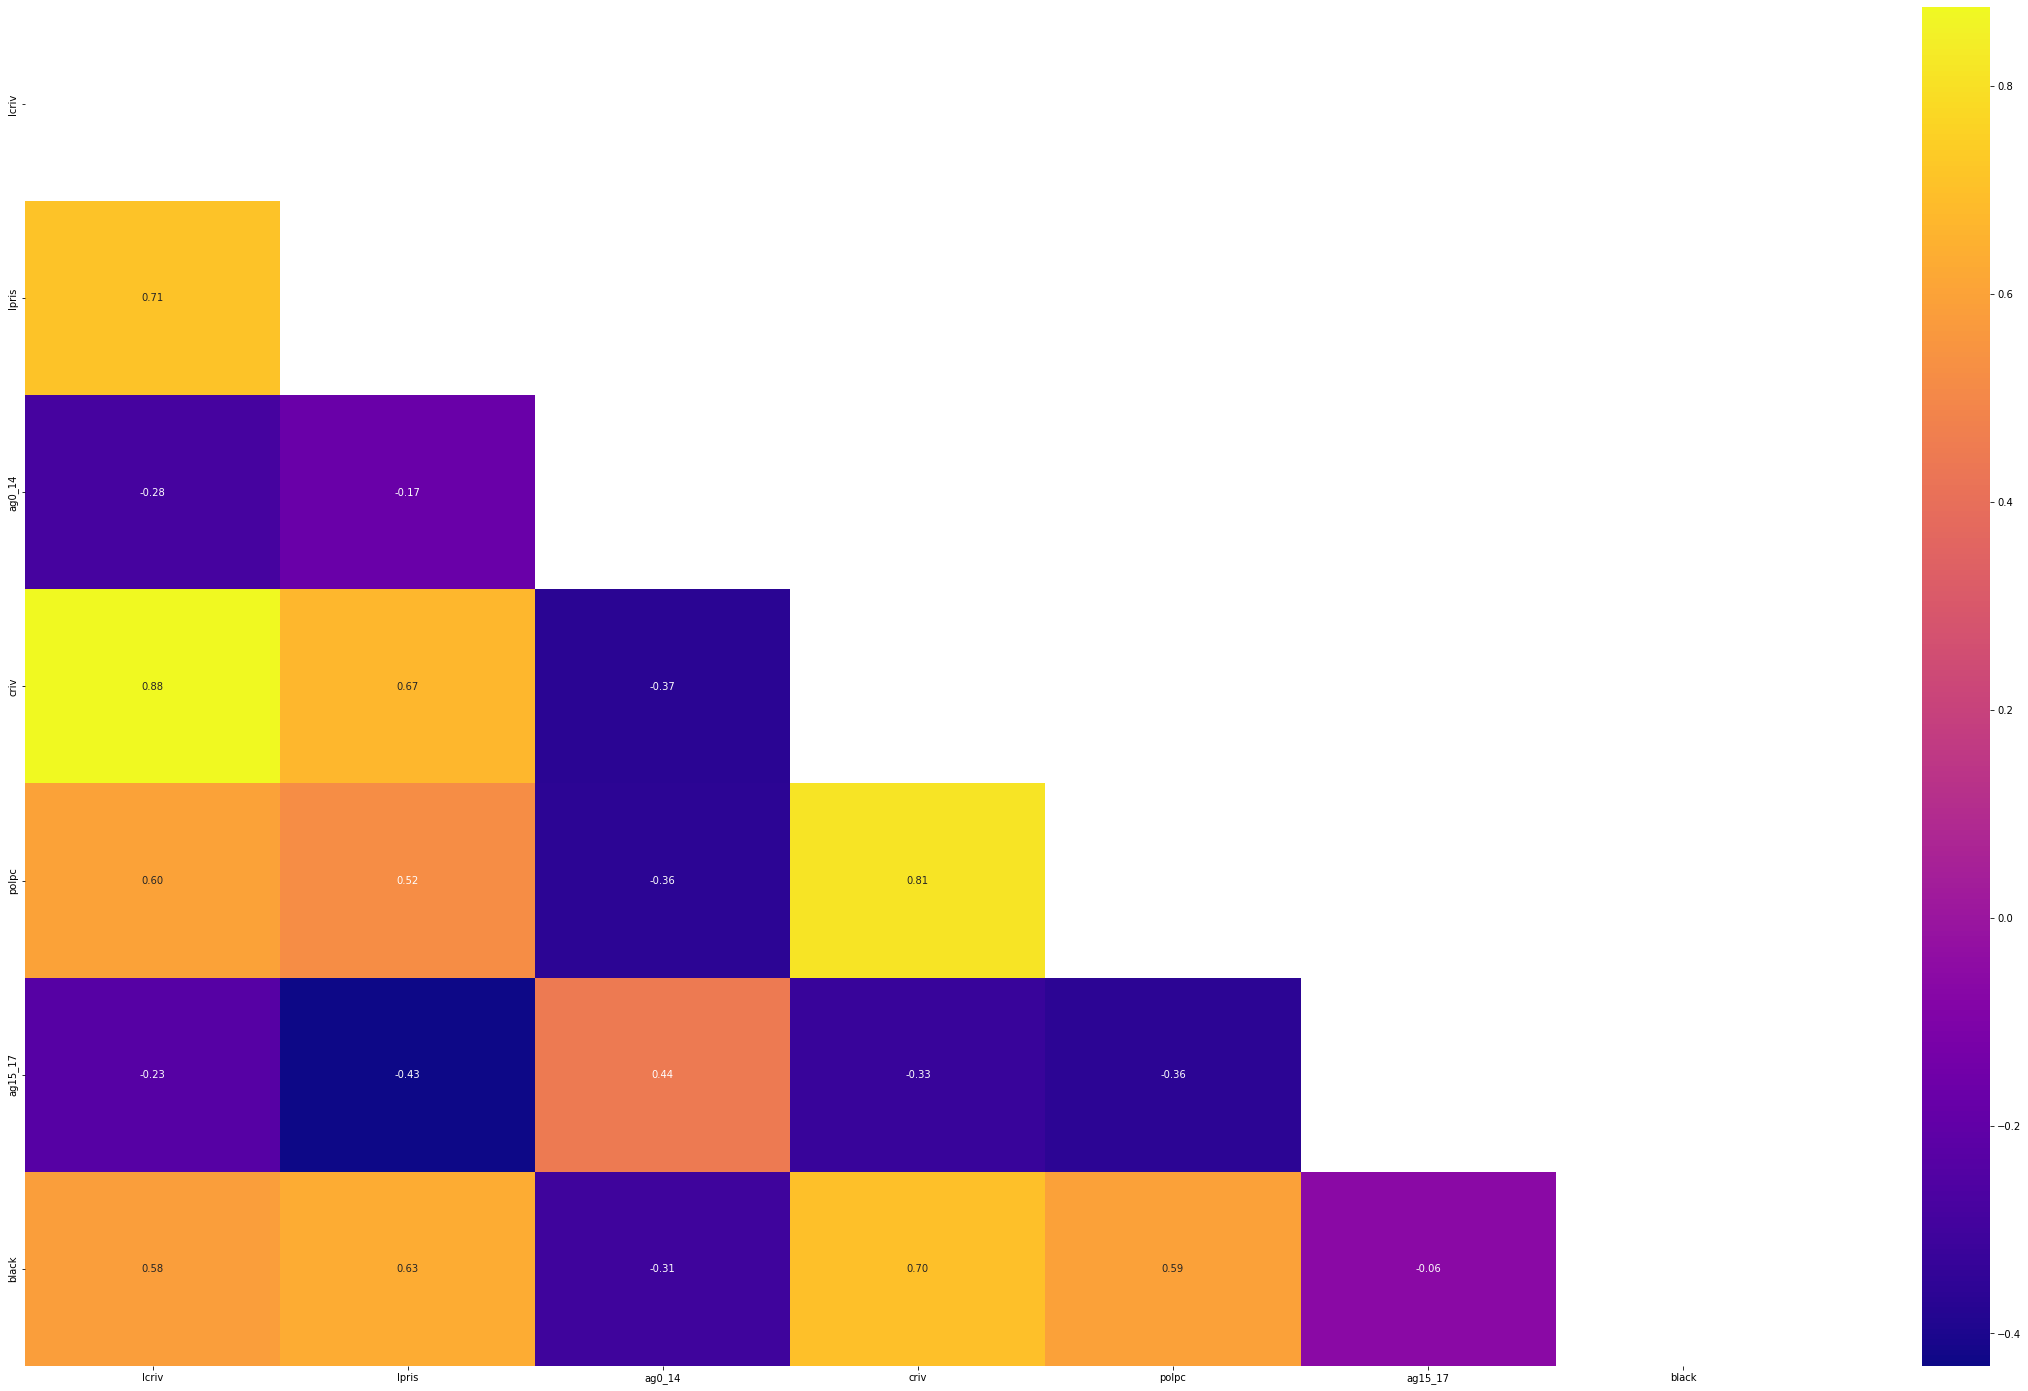

In [25]:
#correlation plot to see how these variables are correlated
fig, ax_s = plt.subplots(figsize=(40,25), ncols=1, nrows=1)
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(X.corr())
dropvals[np.triu_indices_from(dropvals)] = True 
sns.heatmap(X.corr() ,cmap='plasma',ax=ax_s,annot = True, fmt = ".2f", mask = dropvals)
plt.show()

From the above correlation plot both positive and negative correlation exist between the variables.
* The largest bositive correlation is 0.88 and its between criv and icriv
* the largest negative correlation is -0.43 and is between age15_17 and ipris

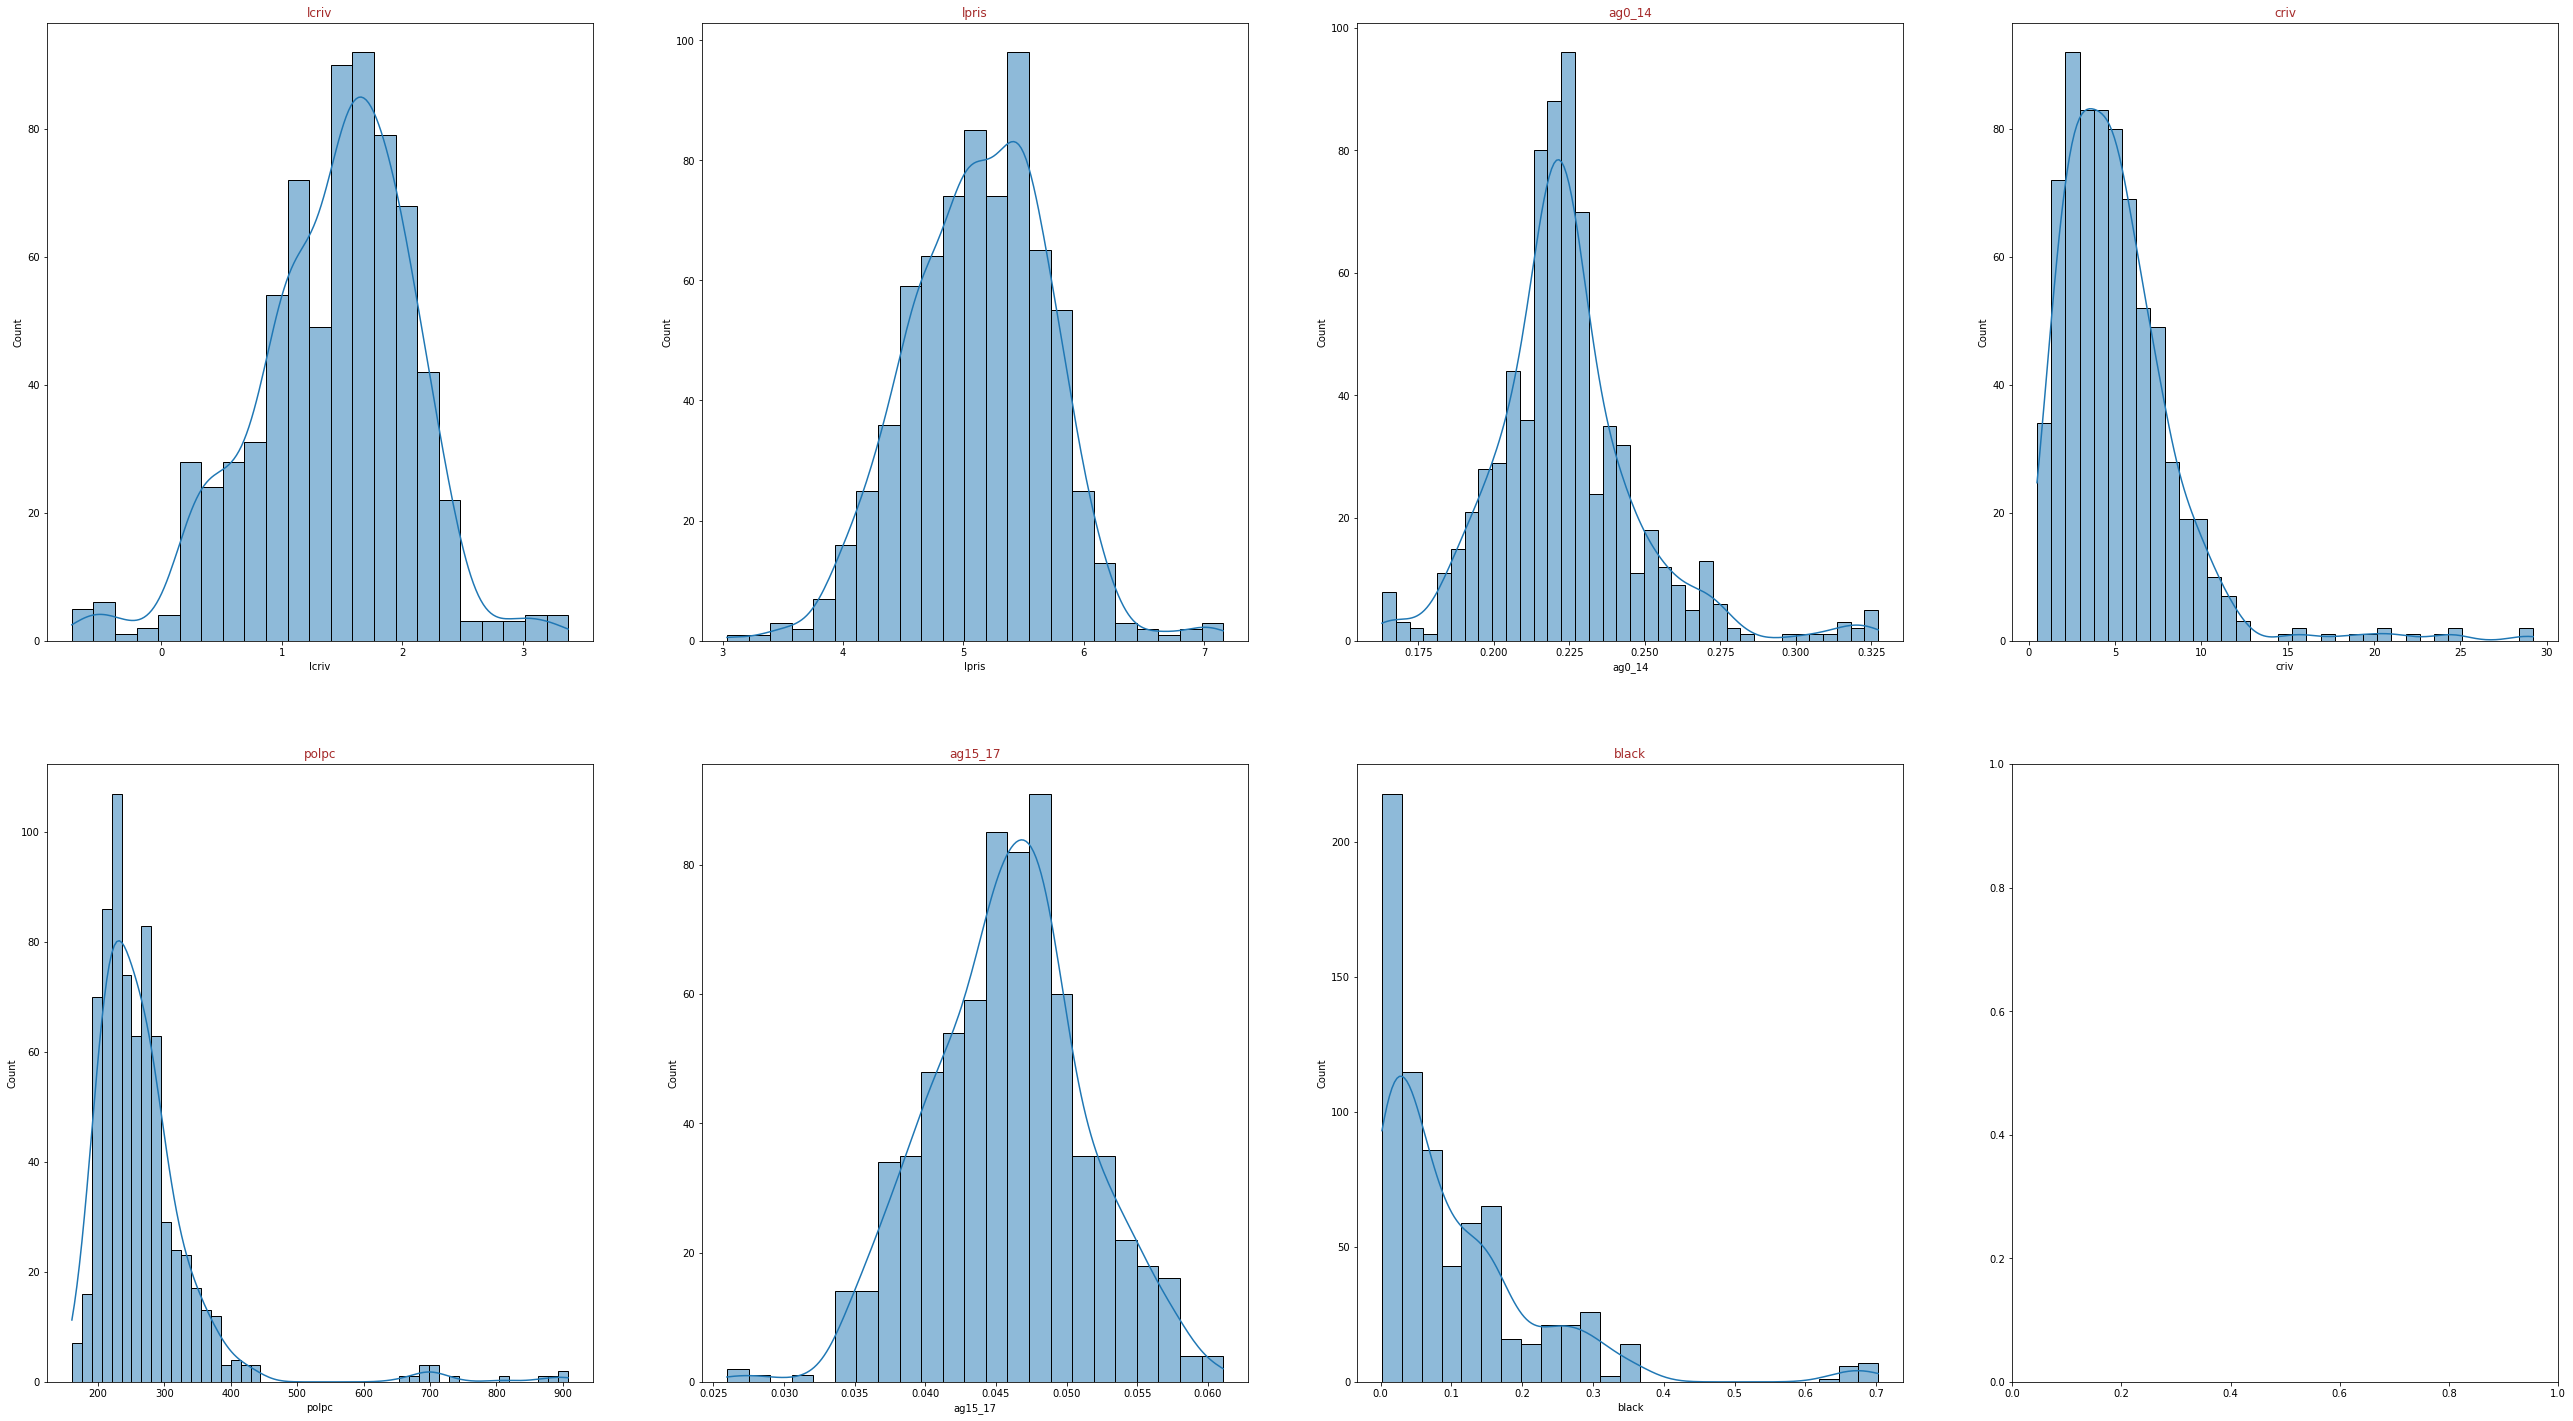

In [26]:
#density plot to see the concetration of the data
histplt_maker(X,impt_cols, 2, 4)

* From the above density plots, icriv, ipris, age0_14, age15_17 look to be normally distributed whereas, criv, black and polpc are positively skewed.

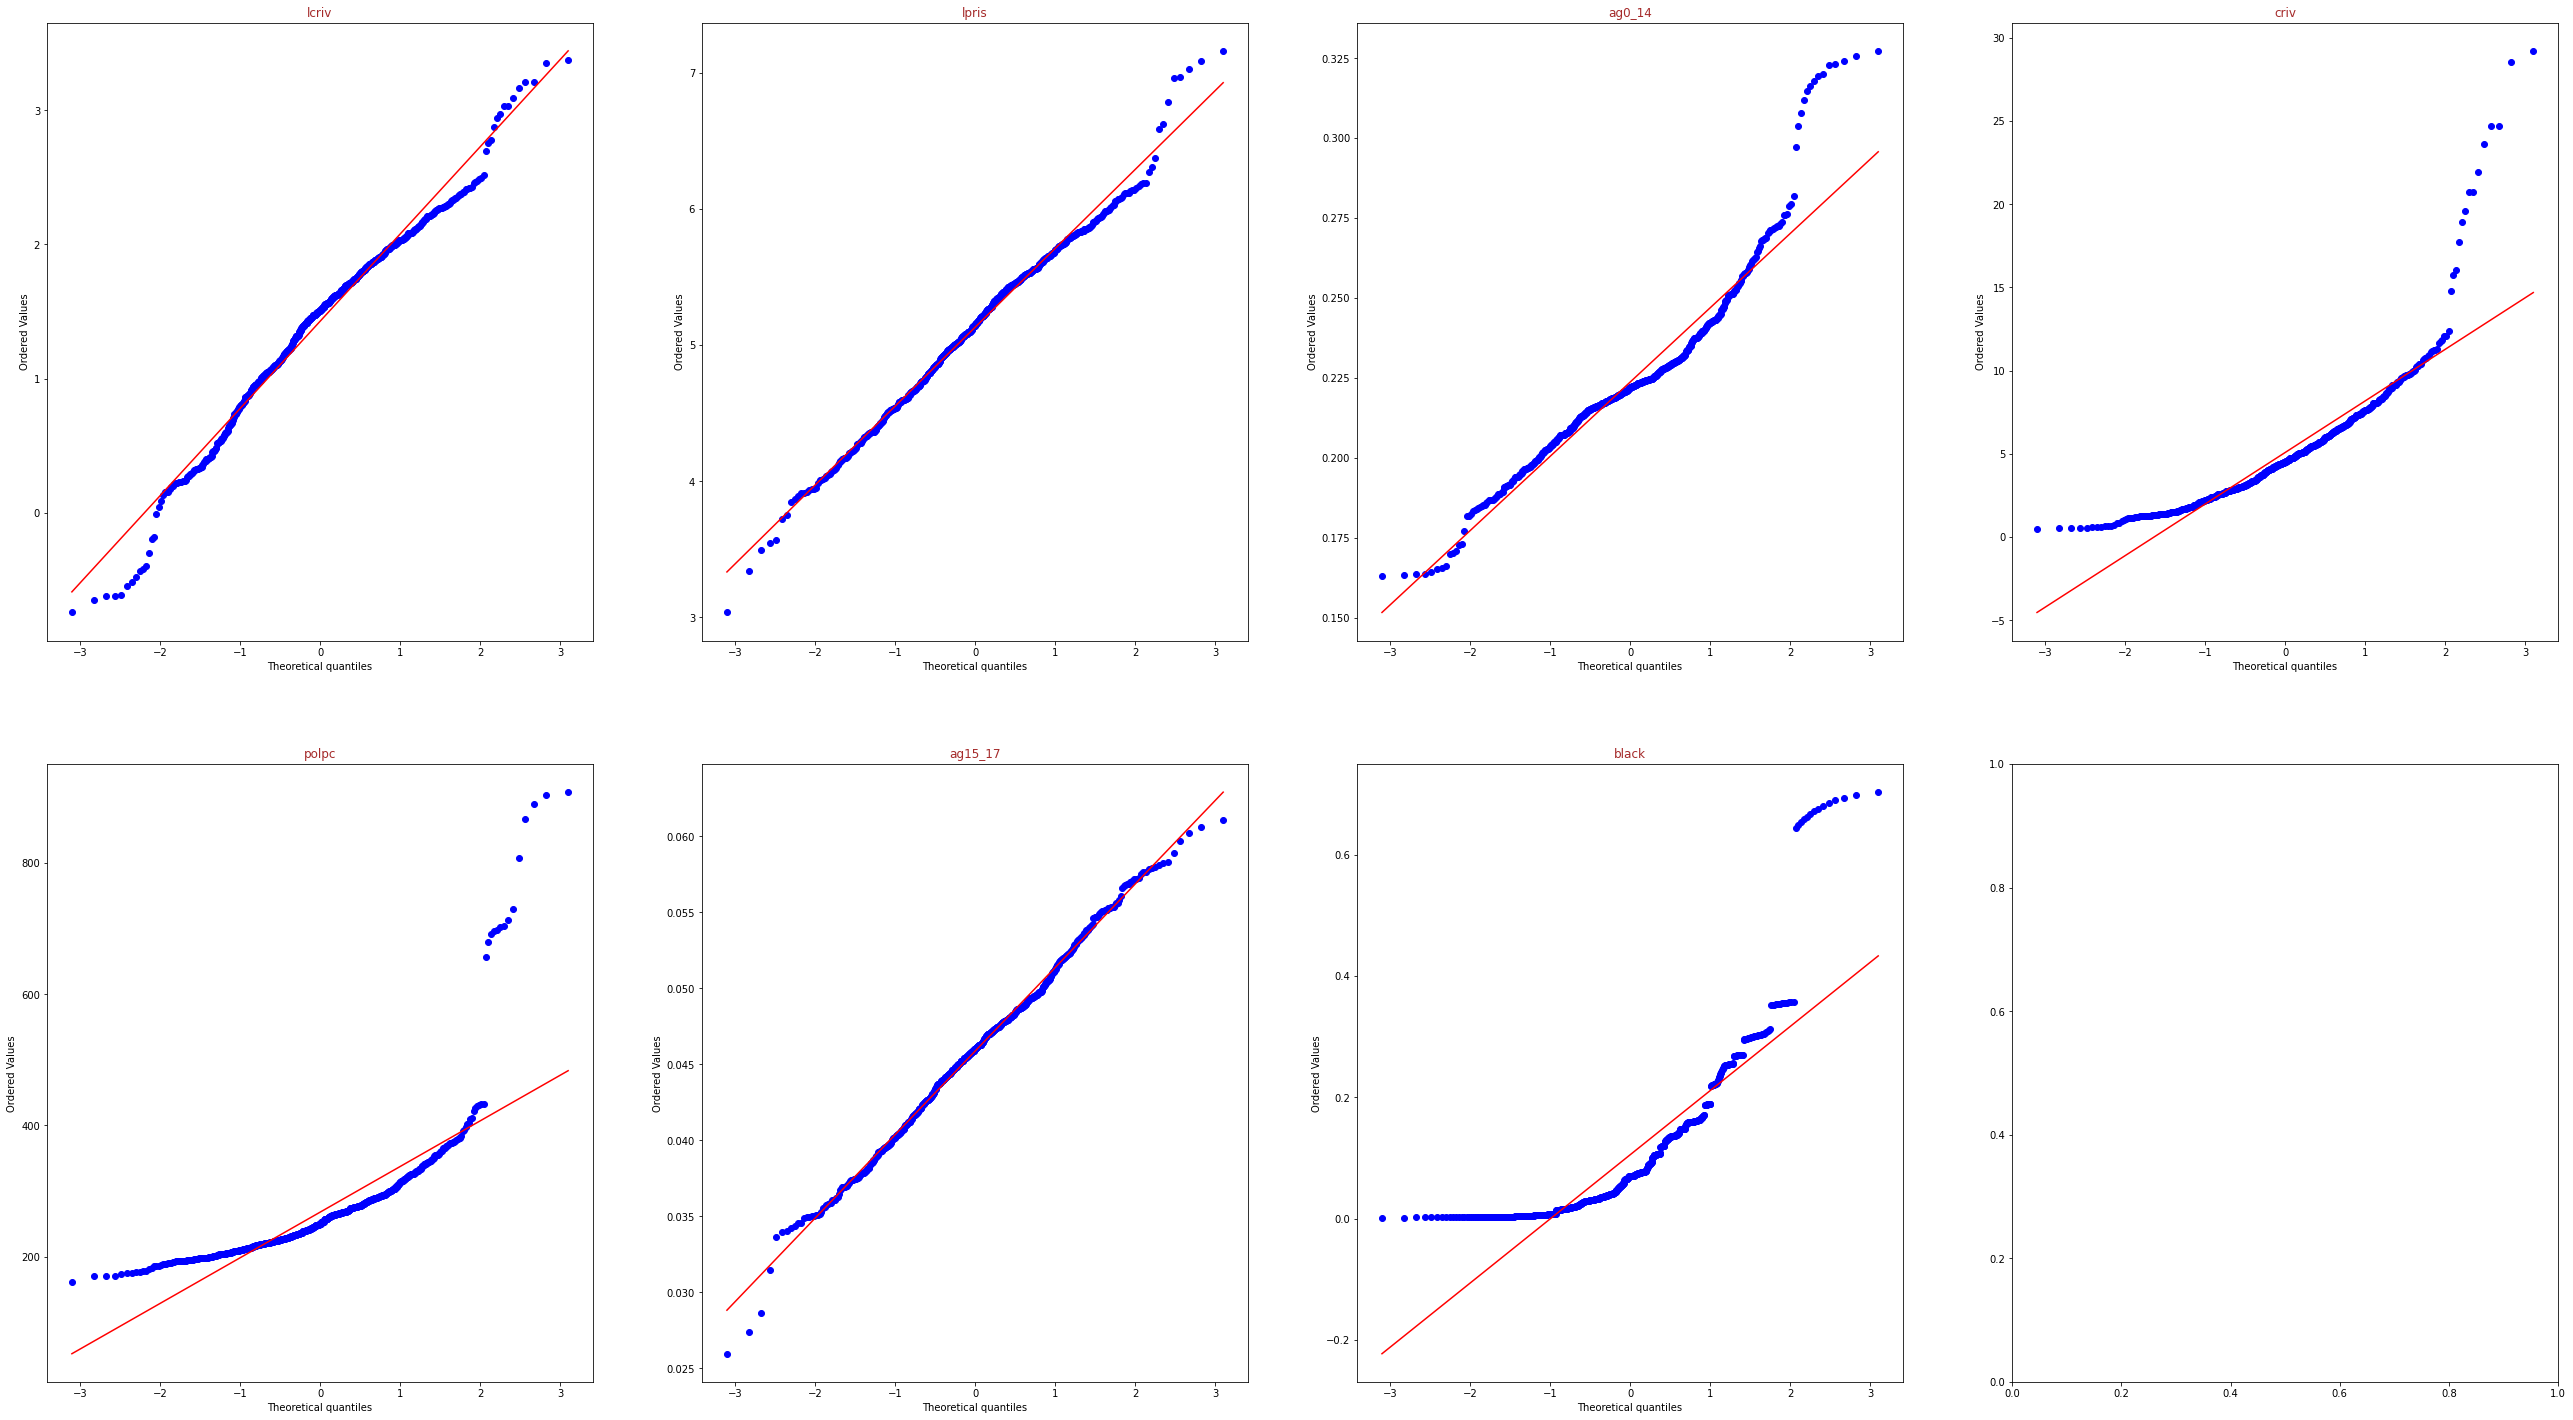

In [27]:
# Create quantile plot to see the relationship between each predictor and normal distribuion
pred_v_dist(X, impt_cols, 4, 2)

* In icriv, ipris, age0_14, age15_17 most of the data fit in the normal distribition.
* In criv, black and polpc most of the data do not fit the normal distribution

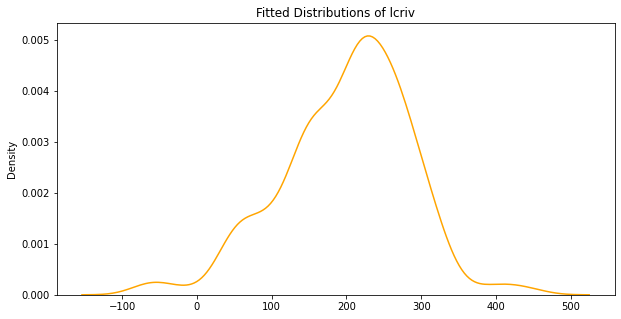

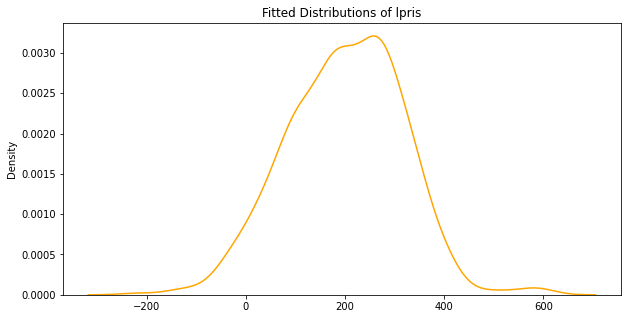

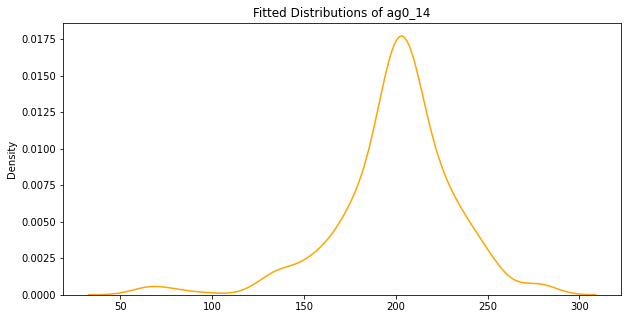

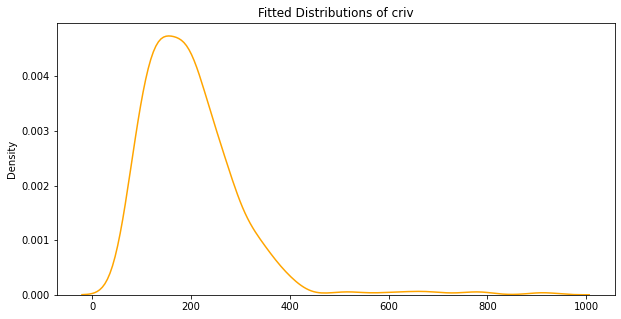

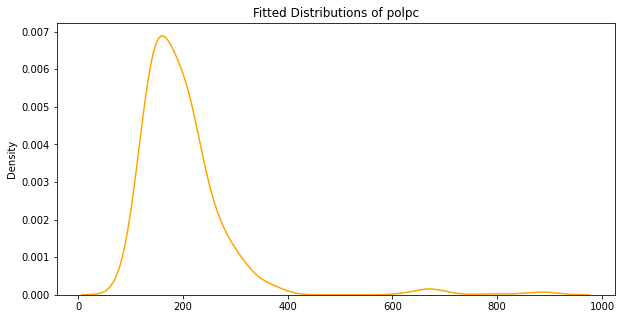

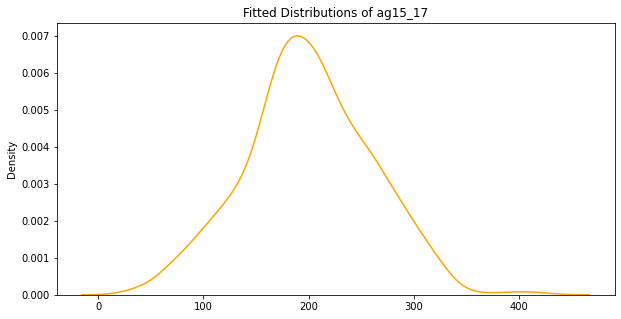

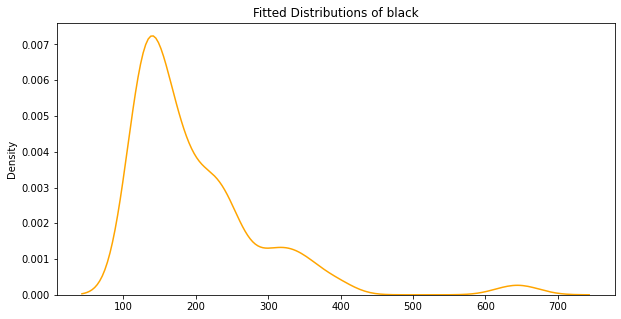

In [28]:
for i in new_data.columns[1:]:
        plt.figure(figsize=(10,5))
        dresults=smf.ols('pris~new_data[i]',data=new_data).fit()
        subdata2=dresults.fittedvalues
        sns.kdeplot(subdata2,color='orange')
        title=str(i)
        plt.title("Fitted Distributions of "+ title)
        plt.show()

* From the above density plots, icriv, ipris, age0_14, age15_17 look to be normally distributed whereas, criv, black and polpc are positively skewed.

In [29]:
import statsmodels.stats.api as sms

# Linearity: Harvey-Collier --> Ho: model is linear
for i in new_data.columns[1:6]:
    ols_mod = smf.ols('pris~new_data[i] ',data=new_data)
    ols_fit=ols_mod.fit()
    print("test for "+str(i))
    name = ["t-stat", "p-value"]
    print(ols_fit.summary())
    test = sms.linear_harvey_collier(ols_fit)
    print("Linearity Test Results:")
    print(list(zip(name, test)))
    print("\n")

# Normaility of the Residuals: Jarque-Bera --> Residuals ~ N(0,1)
    name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
    test = sms.jarque_bera(ols_fit.resid)
    print("JB Results:")
    print(list(zip(name, test)))
    print("\n")

# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
    name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
    test = sms.het_breuschpagan(ols_fit.resid, ols_fit.model.exog)
    print("BP Results:")
    print(list(zip(name, test)))

test for lcriv
                            OLS Regression Results                            
Dep. Variable:                   pris   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     512.2
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           7.35e-86
Time:                        14:09:12   Log-Likelihood:                -4309.3
No. Observations:                 714   AIC:                             8623.
Df Residuals:                     712   BIC:                             8632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.9742      9.091  

* According to the output, for linearity test, the null hypothesis is that model is linear, all p-values are greater than 0.05 and mean that we fail to reject the null. Therefore, all the tested model is linear. 
* For the JB test, the null hypothesis is that residuals are normally distributed, all chi-square two-tail probability is less than 0.05 and we reject the null. Therefore, the residuals of all models are not normally distributed. 
* For the BP test, the null hypothesis is the variances are constant. The p-values of regression between pris, icriv, ipris, age0_14, age15_17, criv, black, polpc are less than 0.05 and we conclude that we reject the null and their variances are constant.

### Fitting models
#### Pooled model

In [30]:
#convert year to datetime
new_data['year'] = pd.to_datetime(dataset['year']+1900, format='%Y')

#add column year to index(creating multi index)
new_data=new_data.set_index('year', append=True)
new_data

,,pris,lcriv,lpris,ag0_14,criv,polpc,ag15_17,black
,year,,,,,,,,
0,1980-01-01,141.334717,1.492425,4.951131,0.240883,4.447868,235.002563,0.057524,0.2560
1,1981-01-01,163.533646,1.547763,5.097019,0.236795,4.700944,227.226334,0.054606,0.2557
2,1982-01-01,183.694809,1.503539,5.213276,0.233631,4.497580,219.439484,0.051975,0.2554
3,1983-01-01,218.624207,1.431945,5.387354,0.231317,4.186833,222.597855,0.049568,0.2551
4,1984-01-01,245.068619,1.470920,5.501538,0.227986,4.353239,214.397766,0.048583,0.2548
...,...,...,...,...,...,...,...,...,...
709,1989-01-01,203.225800,0.985458,5.314318,0.257642,2.679039,355.676880,0.045852,0.0079
710,1990-01-01,224.017471,1.102277,5.411724,0.251101,3.011013,365.638763,0.046256,0.0080
711,1991-01-01,244.493393,1.136460,5.499188,0.248908,3.115721,409.606995,0.048035,0.0081


In [31]:
import statsmodels.api as sm

new_data.index = new_data.index.swaplevel(0, 1)

exog = sm.tools.tools.add_constant(new_data['pris'])
endog = new_data['ag15_17']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

* We first intitialized the model and test for two conditions that is: Homoskedasticity and Non-Autocorrelation.

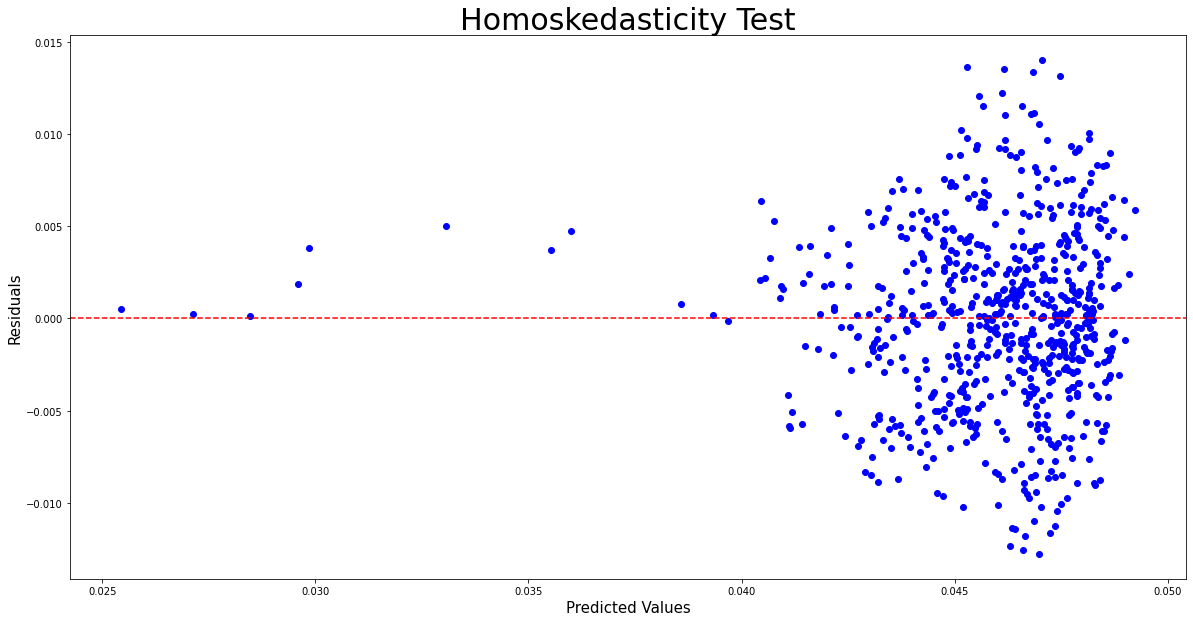

In [32]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt

# 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

* from the above plot of predicted values vs residual(y-axis). the data appears to be mostly concentrated between 0.045 and around 0.049 but spread to around 0.025 residual levels indicating little growth in variance. For heteroskedasticity, this may be is our first violation.

In [33]:
# confirming heteroskedasticity using White- and the Breusch-Pagan-Test
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

pooled_OLS_dataset = pd.concat([new_data, residuals_pooled_OLS], axis=1)
#pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(dataset['pris']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 

print(dict(zip(labels, white_test_results)))
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 

print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 4.926242504735509, 'LM p-val': 0.08516870265456783, 'F-Stat': 2.4698124728514905, 'F p-val': 0.0853262977226562}
{'LM-Stat': 4.636601356370766, 'LM p-val': 0.03129692406967451, 'F-Stat': 4.653834934320382, 'F p-val': 0.03131816940188743}


* White-test: p-value = 0.0853262977226562, which is greater that 0.05
* Breusch-Pagan-test: p-value = 0.03131816940188743, which is less than 0.05

*heteroskedasticity is indicated to a small extent* 

In [34]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.5498917848843591


* In Durbin-Watson-Test has an output of 0.54, which is relatively close to zero indicating strong auto corelation.

#### Fixed effects and Random Effects models

In [35]:
# FE und RE model
exog = sm.tools.tools.add_constant(new_data['pris'])
endog = new_data['ag15_17']

# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 

# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 

#results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                ag15_17   R-squared:                        0.0863
Estimator:              RandomEffects   R-squared (Between):              0.1940
No. Observations:                 714   R-squared (Within):               0.0732
Date:                Sat, Feb 18 2023   R-squared (Overall):              0.1471
Time:                        14:09:25   Log-likelihood                    3031.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      67.266
Entities:                          14   P-value                           0.0000
Avg Obs:                       51.000   Distribution:                   F(1,712)
Min Obs:                       51.000                                           
Max Obs:                       51.000   F-statistic (robust):             67.266
                            

In [36]:
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                ag15_17   R-squared:                        0.0745
Estimator:                   PanelOLS   R-squared (Between):              0.1728
No. Observations:                 714   R-squared (Within):               0.0745
Date:                Sat, Feb 18 2023   R-squared (Overall):              0.1346
Time:                        14:09:25   Log-likelihood                    3068.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      56.282
Entities:                          14   P-value                           0.0000
Avg Obs:                       51.000   Distribution:                   F(1,699)
Min Obs:                       51.000                                           
Max Obs:                       51.000   F-statistic (robust):             56.282
                            

* Both Random Effects and Fixed effect model have very similar performance. We perform Hausman-Test

In [37]:
import numpy.linalg as la

#Hausman-Test
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

hausman_results = hausman(fe_res, re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: -13.74258198356175
degrees of freedom: 2
p-Value: 1.0


## Conclusion

* P-value = 1 therefore the we fail to reject the null hypothesis. We therefore do not have enogeneity in the model. For this reason the random effects model is preferred.
